# NANODEGREE MACHINE LEARNING UDACITY (MLND)
## Preditor de um valor de ação
### Marcelo Luiz de Amorim Cabral
#### 23/05/2018

O estudo que apresento a seguir visa construir as bases de um modelo de aprendizagem de máquina capaz de predizer o valor de uma ação com até 05 dias de antecedência, tendo nisto a base operacional de uma operação swingtrade.  A análise técnica, única utilizada para este tipo de operação dado que a análise fundamentalista só tem sentido em longo prazo, adota diferentes táticas de análise, que vão desde a teoria de Dow e suas figuras até as mais comuns como:
1. Moving Average Convergence/Divergence (MACD), popularmente conhecida como média móvel exponencial de 21 dias, 55 dias, etc.
2. Bandas de Bollinger.

O estudo visa avaliar apenas o segmento de aço brasileiro que é o conjunto de ações de mineradoras e siderurgicas que tenham presença na bolsa de Nova Iorque (Dow Jones) e na Brasileira(B3 Ibovespa).

O objetivo de restringir quanto ao segmento se deve ao esperado comportamento similar das ações, o que permite comparar os resultados da aprendizagem.

O objetivo de restringir quanto às ações B3 que possuam ADR (American Repositary Receipt) se deve ao esperado comportamento similar das ações, em ambos os mercados, visto que os investidores costumam ser os mesmos e assim, obter ações "pouco ruídosas", visto que o Swingtrade tende a apresentar anomalias em seus gráficos, dado o perfil dos investidores típicos.

O estudo apresenta, na ordem numerada abaixo, os seguintes tópicos:

1.  Apresentação do mercado, por meio de um arquivo obtido em um provedor nacional (INFOMONEY) e um internacional (IEX) comparando-os.
    A comparação visa estabelecer relações entre as ações B3IBOV e suas ADR, apenas sob o ponto de vista técnico;
2.  Comparar as ações para estabelecer um comportamento de mercado;
3.  Comparação entre as ações para estabelecer um ranking entre elas;
4.  Estabelecer uma relação risco - retorno e avaliar a veracidade do modelo, por meio da consolidação dos resultados.
5.  Treinar um modelo de inferência, por regressão linear e tentar obter um primeiro resultado de predição.
6.  Treinar um modelo de inferência, por regressão KNN e tentar obter um segundo resultado de predição.
7.  Comparar os resultados das predições e obter um valor possível




### 1. Briefing do mercado

Primeiramente, vamos testar o arquivo obtido em Infomoney.

In [1]:
import pandas as pd
def dados():
    df = pd.read_csv("data/Historico_CSNA3.csv")
    print df.tail()

if __name__ == "__main__":
    dados()

          Data  Historico  Fechamento  Variacao do dia (%)  Abertura  Minimo  \
16  10/04/2018       8.55        8.55                 1.91      8.55    8.44   
17  09/04/2018       8.39        8.39                -2.67      8.68    8.39   
18  06/04/2018       8.62        8.62                -2.82      8.83    8.56   
19  05/04/2018       8.87        8.87                 3.14      8.85    8.75   
20  04/04/2018       8.60        8.60                -2.16      8.55    8.44   

    Medio  Maximo    Volume  Negocios  
16   8.53    8.65  45700978      8301  
17   8.52    8.72  40322719      6353  
18   8.67    8.87  56401118      8817  
19   8.85    8.95  65470160      9068  
20   8.59    8.70  47398924      8064  


Em seguida, vamos testar o arquivo obtido em IEX.

In [2]:
import pandas as pd
def dados():
    df = pd.read_csv("data/IEX_stock_GGB_chart_1y.csv")
    print df.tail()

if __name__ == "__main__":
    dados()

           date  open  high    low  close    volume  unadjustedVolume  change  \
248  2018-05-09  4.73  4.79  4.670   4.79  11118931          11118931    0.26   
249  2018-05-10  4.91  5.03  4.890   5.00  10677251          10677251    0.21   
250  2018-05-11  4.93  5.05  4.845   4.86   7536708           7536708   -0.14   
251  2018-05-14  4.96  4.97  4.805   4.82   4761172           4761172   -0.04   
252  2018-05-15  4.67  4.84  4.650   4.84   8038725           8038725    0.02   

     changePercent    vwap   label  changeOverTime  
248          5.740  4.7461   May 9        0.524410  
249          4.384  4.9782  May 10        0.591242  
250         -2.800  4.9489  May 11        0.546687  
251         -0.823  4.8651  May 14        0.533957  
252          0.415  4.7621  May 15        0.540322  


Na primeira comparação entre layouts de arquivos, temos algumas diferenças na forma como os dados são apresentados, para tanto, a tabela comparativa abaixo visa criar uma correlação ao qual os pontos divergentes serão descritos em seguida.

| IEX  | Infomoney |
| :---------: | :-----------: | 
|IEX_stock_GGB_chart_1m.csv    |        Historico_CSNA3.csv        | 
|Date | Data | 
| Open   |  Abertura        |      
| High   |  Máxima       |
| Low   |  Mínimo      |
| Close   |  Fechamento       |
| Volume  |  Volume       |
| UnadjustedVolume   |  -       |
| Change   | -       |
| ChangePercent   |   Variacao do dia (%)       |
| Vwap  | -     |
| Label   |  -     |
| ChangeOverTime  |  -       |
| -  |Negocios        |
 


O primeiro ponto relevante a se observar é a inexistência dos campos UnadjustedVolume, change, Vwap e Label. Isto se deve a simplficação nos arquivos nacionais, dado que a forma de investir de alguns perfis de investimento brasileiros possuem. Por exemplo, o Vwap é utilizados por fundos de investimentos, e esses utilizam dados mais consistentes, dado que a análise é fundamentalista.

Para simplificar a comparação, vamos estabelecer uma média de todos os campos e pelo gráfico de barras apresentar o desempenho a partir de sua cotação máxima. A ideia aqui é criar um candlestick representativo que permita comparar o desempenho de todas as ações vistas.

media
Historico_CSNA3 Historico              8.858571e+00
Fechamento             8.858571e+00
Variacao do dia (%)   -8.428571e-02
Abertura               8.929048e+00
Minimo                 8.741429e+00
Medio                  8.893810e+00
Maximo                 9.050476e+00
Volume                 7.316412e+07
Negocios               9.132762e+03
dtype: float64
media
Historico_GGBR4 Historico              1.650714e+01
Fechamento             1.650714e+01
Variacao do dia (%)    2.495238e-01
Abertura               1.648714e+01
Minimo                 1.626905e+01
Medio                  1.650476e+01
Maximo                 1.676333e+01
Volume                 1.281536e+08
Negocios               1.338857e+04
dtype: float64
media
Historico_GGBR3 Historico          13.984286
Fech.              13.984286
Var.Dia (%)         0.285238
Abertura           13.954762
Minimo             13.740952
Medio              13.960476
Maximo             14.188095
Volume         631252.047619
dtype: float64
media
His

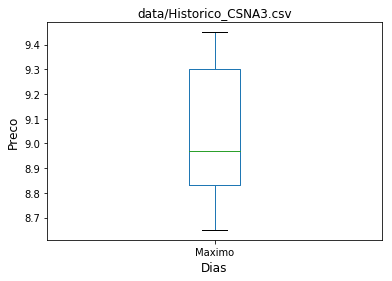

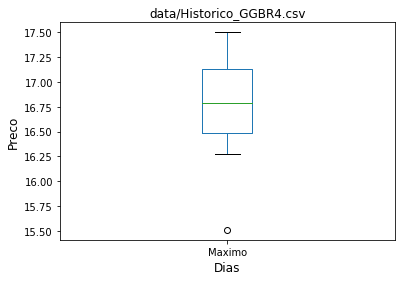

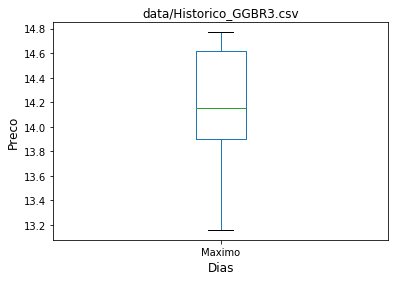

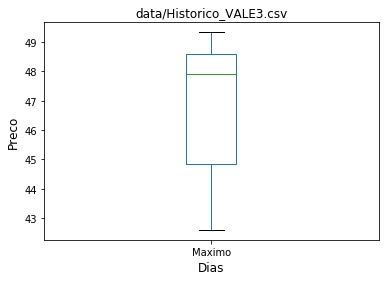

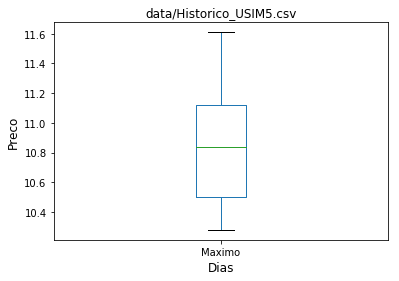

media
IEX_stock_GGB_chart_1y open                3.831398e+00
high                3.902062e+00
low                 3.760173e+00
close               3.828379e+00
volume              8.868319e+06
unadjustedVolume    8.868319e+06
change              7.221664e-03
changePercent       2.281779e-01
vwap                3.830702e+00
changeOverTime      2.183755e-01
dtype: float64
media
IEX_stock_SID_chart_1y open                2.636872e+00
high                2.686907e+00
low                 2.574665e+00
close               2.625652e+00
volume              2.989395e+06
unadjustedVolume    2.989395e+06
change              9.486166e-04
changePercent       1.010593e-01
vwap                2.629846e+00
changeOverTime      7.169476e-02
dtype: float64
media
IEX_stock_VALE_chart_1y open                1.095884e+01
high                1.109904e+01
low                 1.081834e+01
close               1.096974e+01
volume              2.603749e+07
unadjustedVolume    2.603749e+07
change              2.72

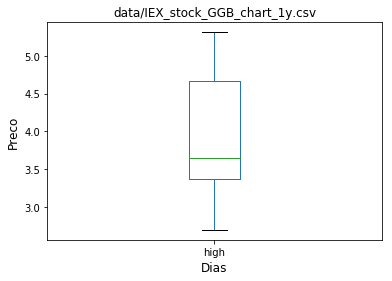

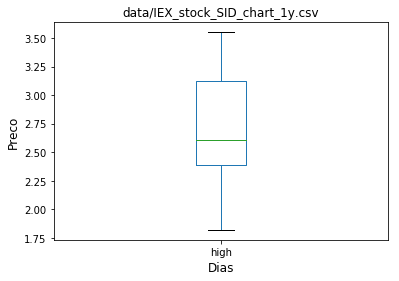

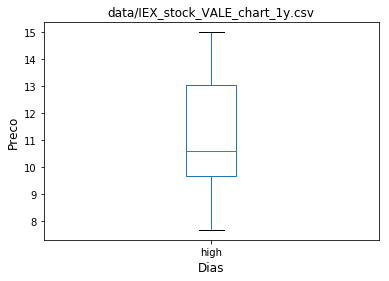

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

def media(acao):    
    df = pd.read_csv("data/{}.csv".format(acao))
    return df.mean()

def media_IMY():
    for acao in ['Historico_CSNA3','Historico_GGBR4','Historico_GGBR3','Historico_VALE3']:
        print "media"
        print acao, media(acao)

def media_IEX():
    for acao in ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']:
        print "media"
        print acao, media(acao) 

def maximo_IMY():
    for acao in ['Historico_CSNA3','Historico_GGBR4','Historico_GGBR3','Historico_VALE3', 'Historico_USIM5']:
        df = pd.read_csv("data/{}.csv".format(acao))
        df['Maximo'].plot(kind='box')
        plt.xlabel('Dias', fontsize=12)
        plt.ylabel('Preco', fontsize=12)
        plt.title("data/{}.csv".format(acao))
        plt.show()
        
def maximo_IEX():
    for acao in ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']:
        df = pd.read_csv("data/{}.csv".format(acao))
        df['high'].plot(kind='box')
        plt.xlabel('Dias', fontsize=12)
        plt.ylabel('Preco', fontsize=12)
        plt.title("data/{}.csv".format(acao))
        plt.show()
    
if __name__ == "__main__":
    media_IMY()
    maximo_IMY()
    media_IEX()
    maximo_IEX()

O que se pode perceber é que as ações B3 Ibovespa e ADR Dow Jones tem comportamento similares e isto reflete o perfil de investimento. A representação em candlestick também permite "imunizar o gráfico" ao ruído típico de operações daytrade/swingtrade, onde fatores externos aos mercados influenciam a opinião do investidor. 

Para que se possa ter uma ideia desta influencia, vejamos um conjunto de notícias referentes à ação GGBR4(IBOV)/GGB(ADR) no periodo analisado:

No primeiro exemplo (05/04) temos um fator político que não possui relação direta com a ação e que foi responsável pela euforia de compra, com alta de 6%, porém só vista na B3 IBOV.
Segundo dia (05/04):
http://www.infomoney.com.br/mercados/acoes-e-indices/noticia/7364632/opcoes-petrobras-disparam-100-com-efeito-lula-veja-mais-cotacoes

Neste segundo exemplo, temos um outro fator externo que possui relação direta com  a ação e que foi responsável pela queda no preço da ADR GGB e consequentemente da ação GGBR4.
Vigésimo dia (23/04):
http://www.infomoney.com.br/mercados/acoes-e-indices/noticia/7386254/siderurgicas-recuam-acompanham-queda-aluminio-apos-decisao-dos-eua

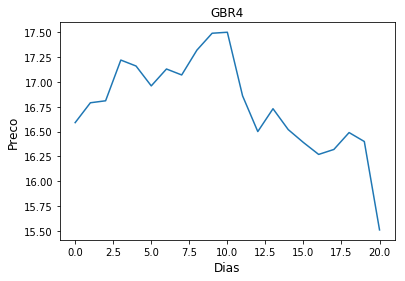

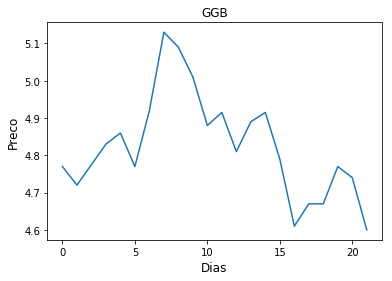

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

def maximo_IMY():
    df = pd.read_csv("data/Historico_GGBR4.csv")
    df['Maximo'].plot()
    plt.xlabel('Dias', fontsize=12)
    plt.ylabel('Preco', fontsize=12)
    plt.title('GGBR4')
    plt.show()
        
def maximo_IEX():
    df = pd.read_csv("data/IEX_stock_GGB_chart_1m.csv")
    df['high'].plot()
    plt.xlabel('Dias', fontsize=12)
    plt.ylabel('Preco', fontsize=12)
    plt.title("GGB")
    plt.show()
        
if __name__ == "__main__":
    maximo_IMY()
    maximo_IEX()

Feita a análise acima, podemos afirmar que os fatores que afetam o humor dos investidores externos tem maior relevância na análise do mercado ao qual as ações estão inseridas e que, por esta razão, obedecem uma curva de tendência mais normalizada e melhor para uma avaliação de um modelo de treinamento.
Portanto, a análise que se dará, deste ponto em diante, se restringirá as ADR GGB, SID e VALE que representam:

| ADR  | B3 Ibovespa |
| :---------: | :-----------: | 
|VALE   |  VALE3        | 
|SID | CSNA3 | 
| GGB   |  GGBR3        |      
|    |  GGBR4       |
|    |  GOAU4      |
| USNZY   |  USIM5       |
| USDMY/USNMY  |        |

Perceba que as ADR Usiminas não estão listadas para as análises e isto se deve as diferenciaçoes na negociação  das ADR destas.


### 2. Parâmetro de mercado

Um primeiro critério de análise é a interpolação de preços com o comparativo gráfico para avaliar se há pontos fora da curva de tendência, se há discrepancias na envoltória ou outros fatores fora da tendência do setor 

C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


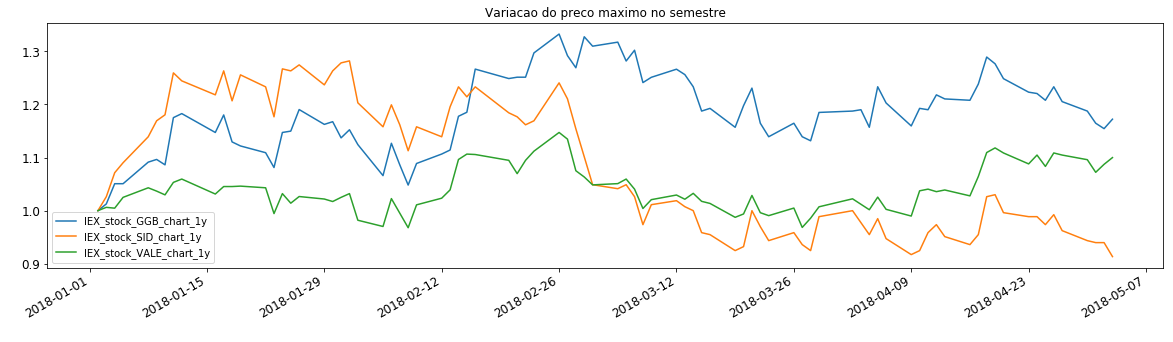

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def busca_acao(acao, base_dir="data"):
     return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, dates):
    df = pd.DataFrame(index=dates)
    if 'IEX_stock_GGB_chart_1y' not in acoes:
        acoes.insert(0,'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date',parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y': 
            df = df.dropna(subset=['IEX_stock_GGB_chart_1y'])
    return df

def normalizado(df):
    return df/ df.ix[0,:]

def grafico(df, title='title', xlabel=" ", ylabel=" "):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def grafico_normalizado(df, columns, start_index, end_index):
    df = normalizado(df)
    grafico(df.ix[start_index:end_index,columns], title="Variacao do preco maximo no semestre")
    df = df.ix[start_index: end_index, columns] 

def teste():
    dates = pd.date_range('2018-01-01', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y'] 
    df = busca_dados(acoes, dates)
    grafico_normalizado(df, ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y'], '2018-01-01', '2018-05-03',)

if __name__ == "__main__":
    teste()

A análise preliminar deste gráfico mostra que o comportamento do mercado seguiu um padrão e, salvo as variações particulares das empresas, o mesmo modelo de aprendizagem pode ser aplicado a cada cada uma das ações. 
Vale o destaque para as ações da SID que sofreram uma tabulação para baixo em 27/02/2018. Isto se deve a uma operação de block trade, ou seja, um grande investidor vende integralmente, ou em grande parte, a sua participação na empresa.
http://www.infomoney.com.br/csn/noticia/7291099/csn-movimenta-milhoes-block-trade-bolsa

C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


IEX_stock_GGB_chart_1y
Preco inicial:  4.55
Preco final:  4.61
Ganho:  1.31868131868 %


IEX_stock_SID_chart_1y
Preco inicial:  2.54
Preco final:  2.43
Ganho:  -4.33070866142 %


IEX_stock_VALE_chart_1y
Preco inicial:  12.65
Preco final:  13.89
Ganho:  9.8023715415 %




Daytrade - media: 
IEX_stock_GGB_chart_1y     0.000885
IEX_stock_SID_chart_1y    -0.001659
IEX_stock_VALE_chart_1y    0.004457
dtype: float64


Daytrade - mediana: 
IEX_stock_GGB_chart_1y    -0.004198
IEX_stock_SID_chart_1y    -0.001992
IEX_stock_VALE_chart_1y    0.001527
dtype: float64


Daytrade - desvio padrão: 
IEX_stock_GGB_chart_1y     0.024822
IEX_stock_SID_chart_1y     0.027330
IEX_stock_VALE_chart_1y    0.020482
dtype: float64


Daytrade - quantil: 
IEX_stock_GGB_chart_1y    -0.004198
IEX_stock_SID_chart_1y    -0.001992
IEX_stock_VALE_chart_1y    0.001527
Name: 0.5, dtype: float64


Daytrade - moda: 
    IEX_stock_GGB_chart_1y  IEX_stock_SID_chart_1y  IEX_stock_VALE_chart_1y
0                -0.035941         

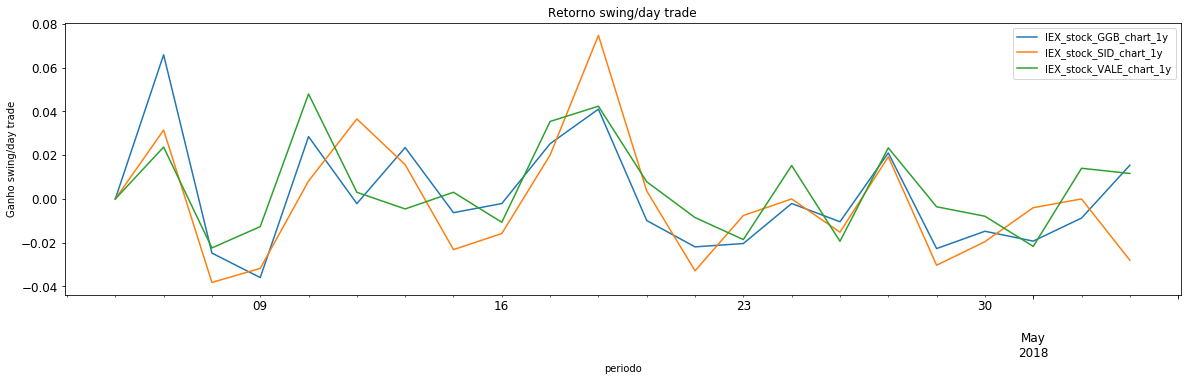

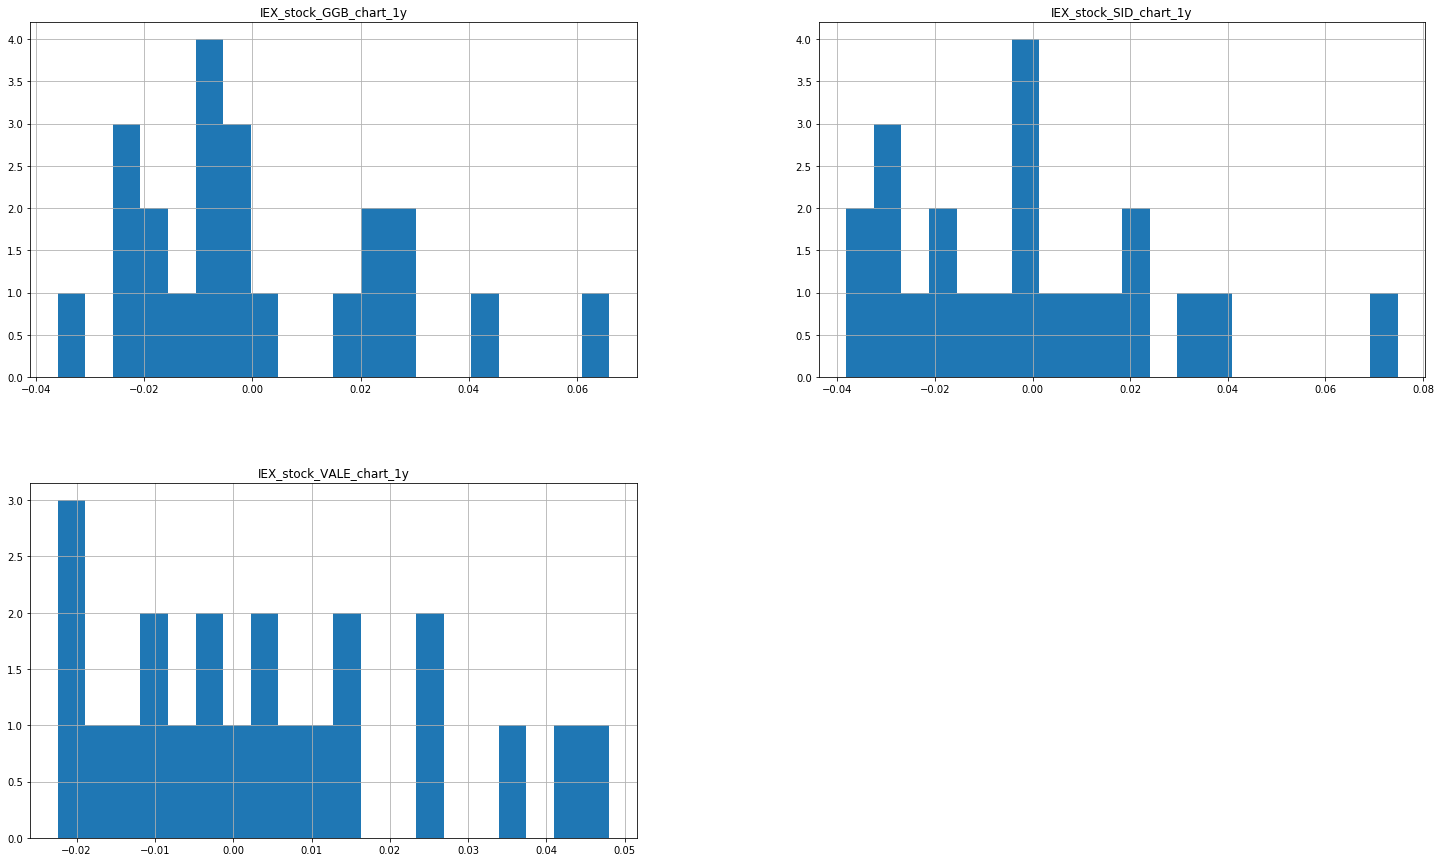

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, dates):
    df = pd.DataFrame(index=dates)
    if 'IEX_stock_GGB_chart_1y' not in acoes:
        acoes.insert(0, 'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date',
                parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y':
            df = df.dropna(subset=["IEX_stock_GGB_chart_1y"])

    return df

def grafico(df, title='title', xlabel=" ", ylabel=" "):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def daytrade(df):
    retorno_diario = (df/df.shift(1)) - 1
    retorno_diario.ix[0,:] = 0
    return retorno_diario

def retorno_diario_line():
    dates = pd.date_range('2018-04-04', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, dates)
    retorno_diario = daytrade(df)
    grafico(retorno_diario, title="Retorno swing/day trade", xlabel="periodo", ylabel="Ganho swing/day trade")
    
def retorno_diario_hist():
    dates = pd.date_range('2018-04-04', '2018-05-03') 
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, dates)
    df.fillna(method="ffill")
    df.fillna(method="bfill")
    retorno_diario = daytrade(df)
    retorno_diario.hist(bins=20, figsize=(25,15))
    
def ganho(df, acoes):
    for acao in acoes:
        first_price = df[acao][0]
        last_price = df[acao][-1]
        cumulative_result = (last_price / first_price - 1) * 100
        print acao
        print "Preco inicial: ", first_price
        print "Preco final: ", last_price
        print "Ganho: ", cumulative_result, "%"
        print "\n"

def Processar_ganho():
    dates = pd.date_range('2018-04-04', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, dates)
    print "Ganho swingtrade ABR/18"
    print "\n"
    compute_cumulative_returns(df, acoes)
    
def estatistica():
    dates = pd.date_range('2018-04-04', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, dates)
    df.fillna(method="ffill")
    df.fillna(method="bfill")
    retorno_diario = daytrade(df)
    ganho(df, acoes)
    print "\n"
    print "Daytrade - media: "
    print retorno_diario.mean()
    print "\n"
    print "Daytrade - mediana: "
    print retorno_diario.median()
    print "\n"
    print "Daytrade - desvio padrão: "
    print retorno_diario.std()
    print "\n"
    print "Daytrade - quantil: "
    print retorno_diario.quantile()
    print "\n"
    print "Daytrade - moda: "
    print retorno_diario.mode()
    print "\n"
    print "Daytrade - variância: "
    print retorno_diario.var()
    print "\n"
    print "Daytrade - desvio médio absoluto: "
    print retorno_diario.mad()
    print "\n"
    
if __name__ == "__main__":
    estatistica()
    retorno_diario_line()
    retorno_diario_hist()


Estes resultados merecem um destaque no que se refere ao desempenho da VALE, pois percebe-se um ganho 10% maior e isto tem relação direta com os seus últimos 15 dias. O gráfico "variação do preço máximo no mês" mostra uma das justificativas, quando se percebe que o preço se manteve, em contraponto  ao block trade de SID.
A análise gráfica das três ações mostram um comportamento similar, contudo o ganho da VALE distoa e isto pode ser explicado pelo noticiário da VALE:

dia 17/04: http://www.infomoney.com.br/mercados/acoes-e-indices/noticia/7380522/petrobras-marca-data-para-apresentar-resultado-regate-bonds-vale-dividendos

Ou seja, mais uma vez, fatores externos à análise técnica influenciaram a cotação.

### 4.  Ranking

beta_SID=  0.811485405065 (Comparativo entre GGB e SID)
alpha_SID=  -0.00237741222773 (Performance de GGB em relação a SID)


C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


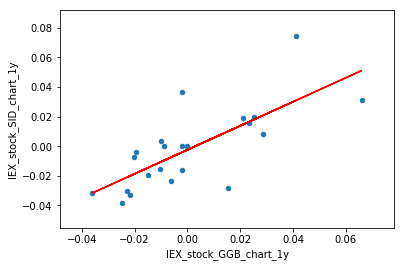



beta_VALE=  0.633903614965 (Comparativo entre GGB e VALE)
alpha_VALE=  0.00389612617241 (Performance de GGB em relação a VALE)


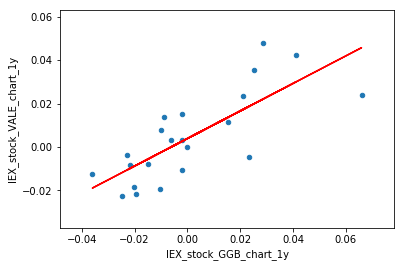



beta_SID=  0.885040086691 (Comparativo entre SID e VALE)
alpha_SID=  -0.00560387853157 (Performance de SID em relação a VALE)


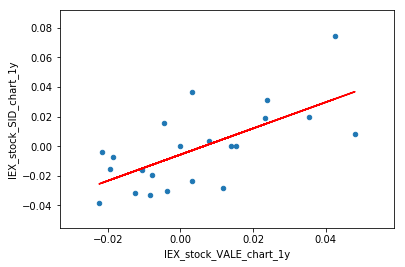



                         IEX_stock_GGB_chart_1y  IEX_stock_SID_chart_1y  \
IEX_stock_GGB_chart_1y                 1.000000                0.736992   
IEX_stock_SID_chart_1y                 0.736992                1.000000   
IEX_stock_VALE_chart_1y                0.768192                0.663282   

                         IEX_stock_VALE_chart_1y  
IEX_stock_GGB_chart_1y                  0.768192  
IEX_stock_SID_chart_1y                  0.663282  
IEX_stock_VALE_chart_1y                 1.000000  


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, dates):
    df = pd.DataFrame(index=dates)
    if 'IEX_stock_GGB_chart_1y' not in acoes:
        acoes.insert(0, 'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date',parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y':
            df = df.dropna(subset=["IEX_stock_GGB_chart_1y"])
    return df

def grafico(df, title="Acoes", xlabel="Date", ylabel="Price"):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def daytrade_processado(df):
    daytrade = (df/df.shift(1)) - 1
    daytrade.ix[0,:] = 0
    return daytrade

def daytrade():
    datas = pd.date_range('2018-04-04', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, datas)
    df.fillna(method="ffill")
    df.fillna(method="bfill")
    daytrade = daytrade_processado(df)
    
    # dispersão - GGB/SID
    daytrade.plot(kind='scatter', x='IEX_stock_GGB_chart_1y', y='IEX_stock_SID_chart_1y')
    beta_SID, alpha_SID =np.polyfit(daytrade['IEX_stock_GGB_chart_1y'], daytrade['IEX_stock_SID_chart_1y'],1)
    print "beta_SID= ", beta_SID, "(Comparativo entre GGB e SID)"
    print "alpha_SID= ", alpha_SID, "(Performance de GGB em relação a SID)"
    plt.plot(daytrade['IEX_stock_GGB_chart_1y'], beta_SID*daytrade['IEX_stock_GGB_chart_1y'] + alpha_SID, '-', color='r')
    plt.show()
    print "\n"
    
    # dispersão - GGB/VALE
    daytrade.plot(kind='scatter', x='IEX_stock_GGB_chart_1y', y='IEX_stock_VALE_chart_1y')
    beta_VALE, alpha_VALE =np.polyfit(daytrade['IEX_stock_GGB_chart_1y'], daytrade['IEX_stock_VALE_chart_1y'],1)
    print "beta_VALE= ", beta_VALE, "(Comparativo entre GGB e VALE)"
    print "alpha_VALE= ", alpha_VALE, "(Performance de GGB em relação a VALE)"
    plt.plot(daytrade['IEX_stock_GGB_chart_1y'], beta_VALE*daytrade['IEX_stock_GGB_chart_1y'] + alpha_VALE, '-', color='r')
    plt.show()
    print "\n"
    
    # dispersão - SID/VALE
    daytrade.plot(kind='scatter', x='IEX_stock_VALE_chart_1y', y='IEX_stock_SID_chart_1y')
    beta_SID, alpha_SID =np.polyfit(daytrade['IEX_stock_VALE_chart_1y'], daytrade['IEX_stock_SID_chart_1y'],1)
    print "beta_SID= ", beta_SID, "(Comparativo entre SID e VALE)"
    print "alpha_SID= ", alpha_SID, "(Performance de SID em relação a VALE)"
    plt.plot(daytrade['IEX_stock_VALE_chart_1y'], beta_SID*daytrade['IEX_stock_VALE_chart_1y'] + alpha_SID, '-', color='r')
    plt.show()
    print "\n"
    
    print daytrade.corr(method='pearson')
    
if __name__ == "__main__":
    
    daytrade()

Ao fazer o comparativo entre elas, por meio de um gráfico de disperção, obtemos as diferenças que justificam a variação do ganho entre VALE e as demais ações. com destaque para o spread entre a CSN (SID) e a Vale (VALE), ocasionado pelo block trade.

Baseado no ranking acima, podemos estabelecer uma comparação entre o portfólio, ou carteira de ações, que temos e o desempenho da pior ação da carteira (SID). 

C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.00475217296817
            Iterations: 5
            Function evaluations: 25
            Gradient evaluations: 5


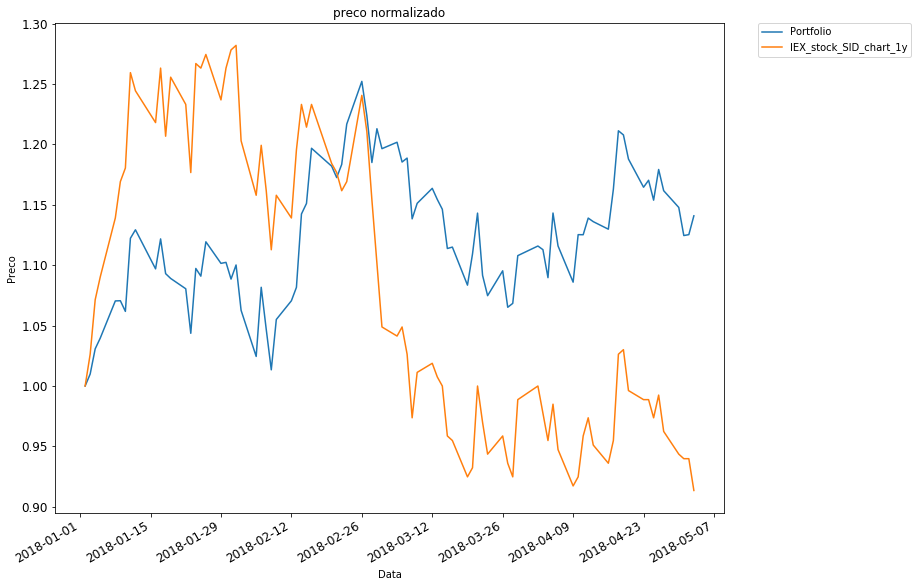

Data inicial: 2018-01-01 00:00:00
Fim: 2018-05-03 00:00:00
Simbolos: ['IEX_stock_GGB_chart_1y', 'IEX_stock_SID_chart_1y', 'IEX_stock_VALE_chart_1y']
Alocacoes: [  5.66503518e-01   1.11022302e-16   4.33496482e-01]
ajuste: 0.00475217296817
Volatilidade: 0.0248235389039
Ganho: 0.00187264823512
Ganho realizado 0.140883144614


In [8]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline 


def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, dates):
    df = pd.DataFrame(index=dates)
    if 'IEX_stock_GGB_chart_1y' not in acoes:
        acoes.insert(0, 'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date', parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y':
            df = df.dropna(subset=["IEX_stock_GGB_chart_1y"])
    return df

def daytrade(df):
    daily_rets = df.copy()
    daily_rets[1:] = (df[1:] / df[:-1].values) - 1
    return daily_rets[1:]

def portfolio(precos, start_val, allocs = [0.1,0.2,0.3,0.4,0.2], rfr = 0.0, sf = 252.0):
    preco_normalizado = precos / precos.ix[0]
    alocado = preco_normalizado * allocs
    port_vals = alocado.sum(axis=1)
    daily_returns = daytrade(port_vals)
    cr = (port_vals[-1] / port_vals[0]) - 1
    adr = daily_returns.mean()  
    sddr = daily_returns.std()  
    sr = (daily_returns - rfr).mean() / (np.sqrt(sf) * (daily_returns).std())
    return cr, adr, sddr, sr, port_vals

def funcao(allocs, precos, start_val = 1000000, rfr = 0.0, sf = 252.0):
    cr, adr, sddr, sr, port_val = portfolio(precos, start_val, allocs, rfr, sf)
    return -sr

def portfolio_otimizado(sd = dt.datetime(2018,1,1), ed = dt.datetime(2018,5,3), syms=['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y'], gen_plot=True):
    dates = pd.date_range(sd, ed)
    precos_all = busca_dados(syms, dates)
    precos_all.fillna(value=None, method="ffill", axis=1, inplace=True, limit=None, downcast=None)
    precos_all.fillna(value=None, method="bfill", axis=1, inplace=True, limit=None, downcast=None)
    precos = precos_all[syms]
    precos_SID = precos_all['IEX_stock_SID_chart_1y']
    estimativa = np.ones(len(syms)) * (1.0/len(syms))
    bounds = [(0,1.0) for i in range(len(syms))]
    allocs = minimize(funcao, estimativa, args=(precos,), bounds=bounds, method='SLSQP', options={'disp':True}, constraints=({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)})).x
    cr, adr, sddr, sr, port_val = portfolio(precos, start_val=1.0, allocs=allocs, rfr=0.0, sf=252.0)
    preco_normalizado = precos / precos.ix[0]
    alocado = preco_normalizado * allocs
    port_vals = alocado.sum(axis=1)
    port_val = daytrade(port_vals)
    if gen_plot:
        df_temp = pd.concat([port_vals, precos_SID/precos_SID[0]], keys=['Portfolio', 'IEX_stock_SID_chart_1y', 'IEX_stock_GGB_chart_1y'], axis=1)
        ax = df_temp.plot(title="preco normalizado",fontsize=12,figsize=(12,10))
        ax.set_xlabel("Data")
        ax.set_ylabel("Preco")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        pass
    return allocs, cr, adr, sddr, sr

def teste():
    data_inicial = dt.datetime(2018,1,1)
    data_final = dt.datetime(2018,5,3)
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    alocacoes, cr, adr, sddr, sr = portfolio_otimizado(sd = data_inicial, ed = data_final,syms= acoes, gen_plot = True)
    print "Data inicial:", data_inicial
    print "Fim:", data_final
    print "Simbolos:", acoes
    print "Alocacoes:", alocacoes
    print "ajuste:", sr
    print "Volatilidade:", sddr
    print "Ganho:", adr
    print "Ganho realizado", cr

    
if __name__ == "__main__":
    teste()

A curva referente ao portfólio corresponde a curva da ADR VALE e a coincidência apenas mostra que o ganho máximo obtido em VALE consegue cobrir as variações ocorridas nas demais, em particular na SID, tornando o ganho do portfólio em ganho real.  

C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


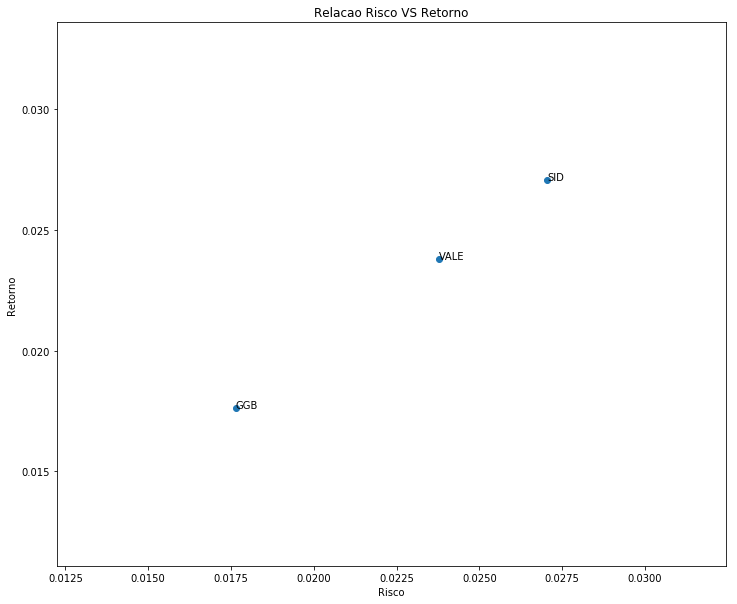

In [9]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, datas):
    df = pd.DataFrame(index=datas)
    if 'IEX_stock_GGB_chart_1y' not in acoes:
        acoes.insert(0, 'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date',parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y':
            df = df.dropna(subset=["IEX_stock_GGB_chart_1y"])
    return df
  
def daytrade_tot(df):
    daytrade = (df/df.shift(1)) - 1
    daytrade.ix[0,:] = 0
    return daytrade
   
def dado_normalizado(df):
    return df/ df.ix[0,:]
    
def portfolio(df):
    daytrade = (df/df.shift(1)) - 1
    daytrade.ix[0] = 0
    return daytrade

def dispersao():
    datas = pd.date_range('2018-01-01', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, datas)
    df.fillna(method="ffill")
    df.fillna(method="bfill")
    daytrade_all = daytrade_tot(df)
    daytrade_all = daytrade_all[1:] 
    df_normalizado = dado_normalizado(df)
    daytrade_acoes = portfolio(df_normalizado)
    daytrade_acoes = daytrade_acoes[1:]
    print "\n"
    Ganho_GGB = daytrade_acoes['IEX_stock_GGB_chart_1y'].mean()
    Risco_GGB = daytrade_acoes['IEX_stock_GGB_chart_1y'].std()
    Risco_GGB = daytrade_acoes['IEX_stock_GGB_chart_1y'].mad()
    Ganho_SID = daytrade_acoes['IEX_stock_SID_chart_1y'].mean()
    Risco_SID = daytrade_acoes['IEX_stock_SID_chart_1y'].std()
    Risco_SID = daytrade_acoes['IEX_stock_SID_chart_1y'].mad()
    Ganho_VALE = daytrade_acoes['IEX_stock_VALE_chart_1y'].mean()
    Risco_VALE = daytrade_acoes['IEX_stock_VALE_chart_1y'].std()
    Risco_VALE = daytrade_acoes['IEX_stock_VALE_chart_1y'].mad()
    x_risk = np.array([Risco_GGB, Risco_SID, Risco_VALE],)
    y_return = np.array([Risco_GGB, Risco_SID, Risco_VALE],)
    plt.figure(figsize=(12,10))
    plt.scatter(x_risk, y_return)
    plt.title("Relacao Risco VS Retorno")
    plt.xlabel("Risco")
    plt.ylabel("Retorno")
    plt.annotate("VALE", (x_risk[0], y_return[0]))
    plt.annotate("SID", (x_risk[1], y_return[1]))
    plt.annotate("GGB", (x_risk[2], y_return[2]))
    plt.show()
    
if __name__ == "__main__":
    dispersao()

A relação risco retorno das ações mostram alguns pontos relevantes:
1. A GGB mostra uma menor relação risco retorno, embora seu preço tenha sofrido uma tabulação para cima (vide gráfico variação do preço máximo no mês), na mesma época do block trade, o que sugere uma migração de capital entre as ações. É possível que esta migração tenha influenciado o resultado.
2. A vale apresenta uma variação mais constante de seu valor (vide o gráfico retorno swingtrade/daytrade) onde a ADR VALE não apresenta picos em relação as demais ações.
3. A SID apresenta uma relação oposta a GGB e isto sugere o opsoto ao descrito no item 1.

Portanto, para validar estas hipoteses, vamos analisar as ações no periodo 01 ano.

C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


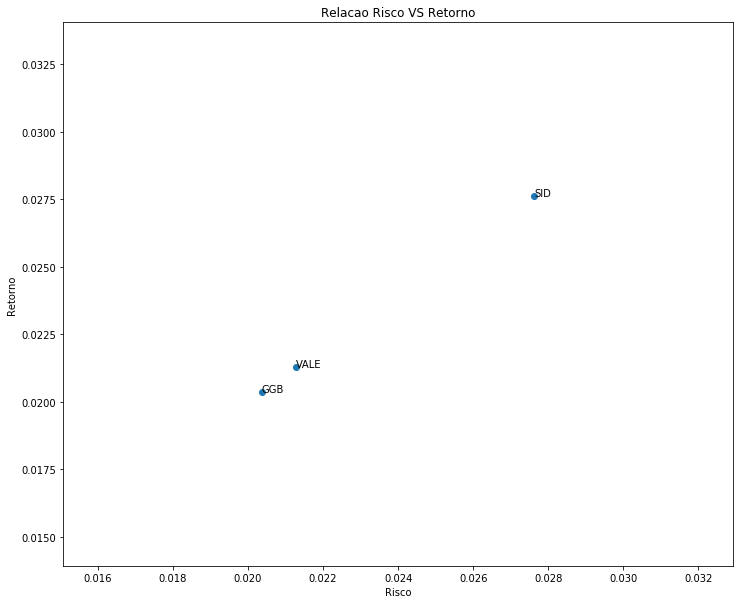

In [10]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, datas):
    df = pd.DataFrame(index=datas)
    if 'IEX_stock_GGB_chart_1y' not in acoes:
        acoes.insert(0, 'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date',parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y':
            df = df.dropna(subset=["IEX_stock_GGB_chart_1y"])
    return df
  
def daytrade_tot(df):
    daytrade = (df/df.shift(1)) - 1
    daytrade.ix[0,:] = 0
    return daytrade
   
def dado_normalizado(df):
    return df/ df.ix[0,:]
    
def portfolio(df):
    daytrade = (df/df.shift(1)) - 1
    daytrade.ix[0] = 0
    return daytrade

def dispersao():
    datas = pd.date_range('2017-05-01', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, datas)
    df.fillna(method="ffill")
    df.fillna(method="bfill")
    daytrade_all = daytrade_tot(df)
    daytrade_all = daytrade_all[1:] 
    df_normalizado = dado_normalizado(df)
    daytrade_acoes = portfolio(df_normalizado)
    daytrade_acoes = daytrade_acoes[1:]
    print "\n"
    Ganho_GGB = daytrade_acoes['IEX_stock_GGB_chart_1y'].mean()
    Risco_GGB = daytrade_acoes['IEX_stock_GGB_chart_1y'].std()
    Risco_GGB = daytrade_acoes['IEX_stock_GGB_chart_1y'].mad()
    Ganho_SID = daytrade_acoes['IEX_stock_SID_chart_1y'].mean()
    Risco_SID = daytrade_acoes['IEX_stock_SID_chart_1y'].std()
    Risco_SID = daytrade_acoes['IEX_stock_SID_chart_1y'].mad()
    Ganho_VALE = daytrade_acoes['IEX_stock_VALE_chart_1y'].mean()
    Risco_VALE = daytrade_acoes['IEX_stock_VALE_chart_1y'].std()
    Risco_VALE = daytrade_acoes['IEX_stock_VALE_chart_1y'].mad()
    x_risk = np.array([Risco_GGB, Risco_SID, Risco_VALE],)
    y_return = np.array([Risco_GGB, Risco_SID, Risco_VALE],)
    plt.figure(figsize=(12,10))
    plt.scatter(x_risk, y_return)
    plt.title("Relacao Risco VS Retorno")
    plt.xlabel("Risco")
    plt.ylabel("Retorno")
    plt.annotate("VALE", (x_risk[0], y_return[0]))
    plt.annotate("SID", (x_risk[1], y_return[1]))
    plt.annotate("GGB", (x_risk[2], y_return[2]))
    plt.show()
    
if __name__ == "__main__":
    dispersao()

Ao modificar o periodo de análise da relação risco retorno, considerando o peírodo de 01 ano (01/05/2017 a 03/05/2018) é possível observar uma relação risco retorno mais coerente aos resultados obtidos na retorno swing trade/Day trade, pois uma ação que segue uma tendência crescente sem grandes variações é potencialmente mais segura.
Portanto, vale a reanálise destas ações no período de 01 ano para atestar as hipotéses.

C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


IEX_stock_GGB_chart_1y
Preco inicial:  3.1422
Preco final:  4.61
Ganho:  46.7124944307 %


IEX_stock_SID_chart_1y
Preco inicial:  2.45
Preco final:  2.43
Ganho:  -0.816326530612 %


IEX_stock_VALE_chart_1y
Preco inicial:  8.2577
Preco final:  13.89
Ganho:  68.2066434964 %




Daytrade - media: 
IEX_stock_GGB_chart_1y     0.001967
IEX_stock_SID_chart_1y     0.000591
IEX_stock_VALE_chart_1y    0.002951
dtype: float64


Daytrade - mediana: 
IEX_stock_GGB_chart_1y     0.002036
IEX_stock_SID_chart_1y     0.000000
IEX_stock_VALE_chart_1y    0.002781
dtype: float64


Daytrade - desvio padrão: 
IEX_stock_GGB_chart_1y     0.028239
IEX_stock_SID_chart_1y     0.035229
IEX_stock_VALE_chart_1y    0.042026
dtype: float64


Daytrade - quantil: 
IEX_stock_GGB_chart_1y     0.002036
IEX_stock_SID_chart_1y     0.000000
IEX_stock_VALE_chart_1y    0.002781
Name: 0.5, dtype: float64


Daytrade - moda: 
   IEX_stock_GGB_chart_1y  IEX_stock_SID_chart_1y  IEX_stock_VALE_chart_1y
0                     0.0      

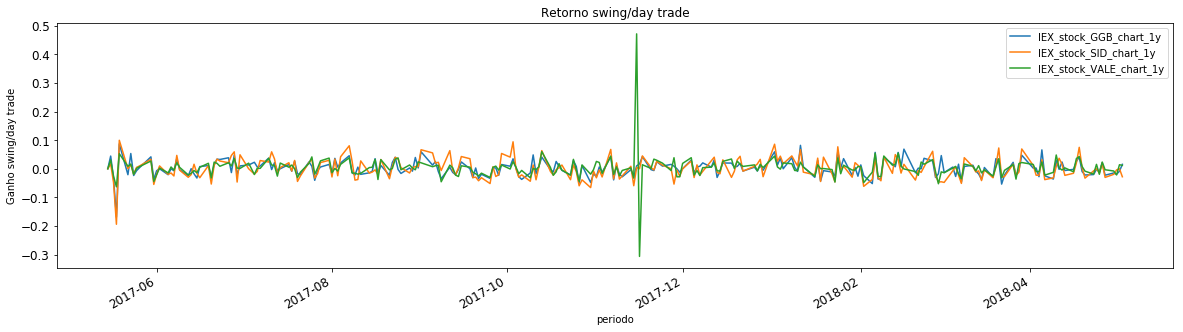

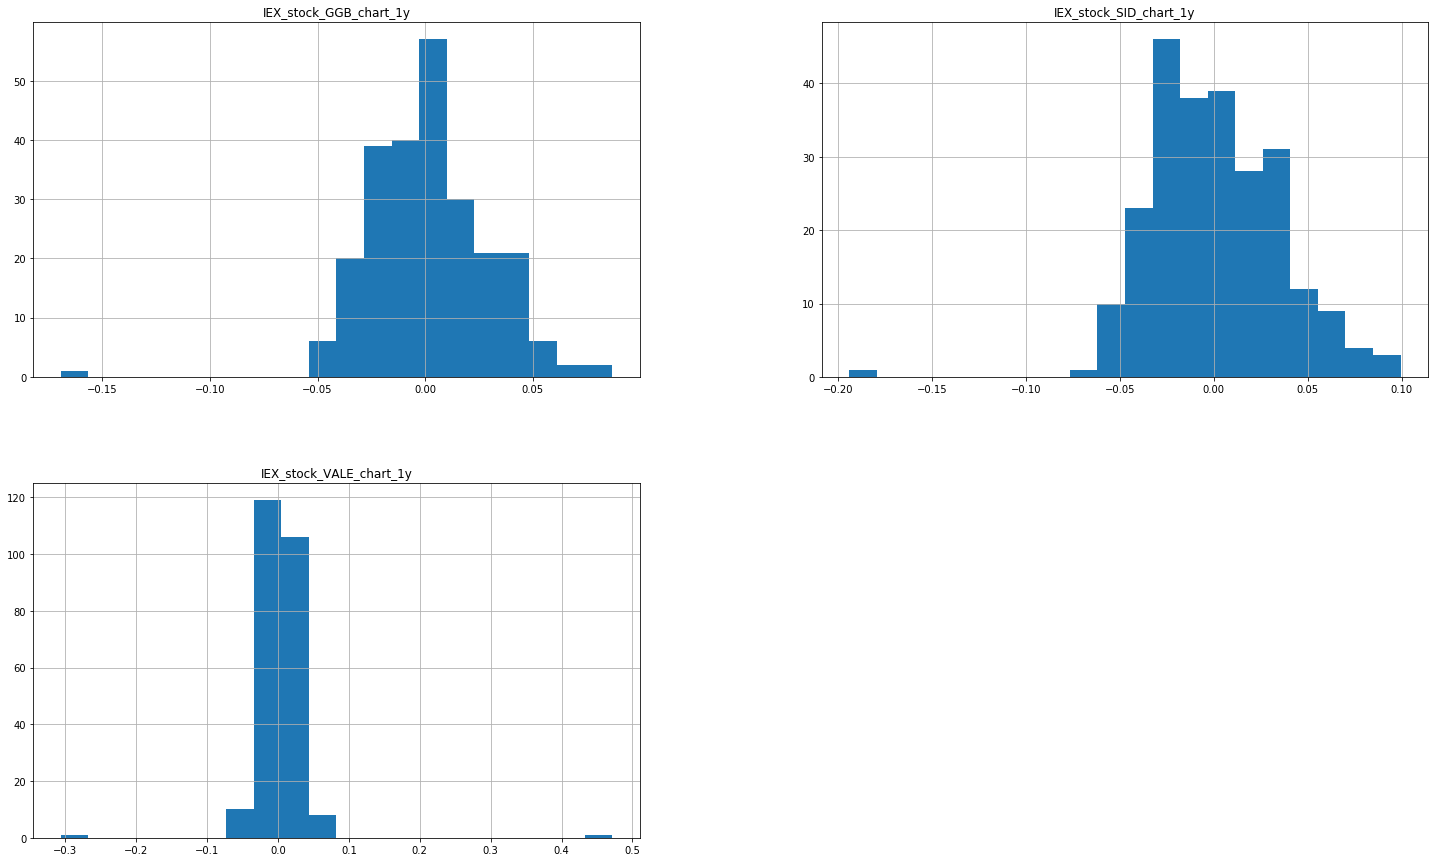

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, dates):
    df = pd.DataFrame(index=dates)
    if 'IEX_stock_GGB_chart_1y' not in acoes: 
        acoes.insert(0, 'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date',parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y': 
            df = df.dropna(subset=["IEX_stock_GGB_chart_1y"])

    return df

def grafico(df, title='acao', xlabel=" ", ylabel=" "):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def daytrade(df):
    retorno_diario = (df/df.shift(1)) - 1
    retorno_diario.ix[0,:] = 0
    return retorno_diario

def retorno_diario_line():
    dates = pd.date_range('2017-05-01', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, dates)
    retorno_diario = daytrade(df)
    grafico(retorno_diario, title="Retorno swing/day trade", xlabel="periodo", ylabel="Ganho swing/day trade")
    
def retorno_diario_hist():
    dates = pd.date_range('2017-05-01', '2018-05-03') 
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, dates)
    df.fillna(method="ffill")
    df.fillna(method="bfill")
    retorno_diario = daytrade(df)
    retorno_diario.hist(bins=20, figsize=(25,15))
    
def ganho(df, acoes):
    for acao in acoes:
        preco_inicial = df[acao][0]
        preco_final = df[acao][-1]
        ganho = (preco_final / preco_inicial - 1) * 100
        print acao
        print "Preco inicial: ", preco_inicial
        print "Preco final: ", preco_final
        print "Ganho: ", ganho, "%"
        print "\n"

def Processar_ganho():
    dates = pd.date_range('2017-05-01', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, dates)
    print "Ganho swingtrade ABR/18"
    print "\n"
    compute_cumulative_returns(df, acoes)
    
def estatistica():
    dates = pd.date_range('2017-05-01', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y']
    df = busca_dados(acoes, dates)
    df.fillna(method="ffill")
    df.fillna(method="bfill")
    retorno_diario = daytrade(df)
    ganho(df, acoes)
    print "\n"
    print "Daytrade - media: "
    print retorno_diario.mean()
    print "\n"
    print "Daytrade - mediana: "
    print retorno_diario.median()
    print "\n"
    print "Daytrade - desvio padrão: "
    print retorno_diario.std()
    print "\n"
    print "Daytrade - quantil: "
    print retorno_diario.quantile()
    print "\n"
    print "Daytrade - moda: "
    print retorno_diario.mode()
    print "\n"
    print "Daytrade - variância: "
    print retorno_diario.var()
    print "\n"
    print "Daytrade - desvio médio absoluto: "
    print retorno_diario.mad()
    print "\n"
    
if __name__ == "__main__":
    estatistica()
    retorno_diario_line()
    retorno_diario_hist()


A análise anual atesta as hipóteses, pois agora temos o seguinte cenário:
1. A ADR VALE apresenta uma variação muito concentrada em torno de 0, o que mostra pouca volatilidade;
2. A ADR VALE apresenta um ganho de 68.2066434964%, e isto mostra uma tendência crescente;
3. A ADR VALE acompanhou a enorme volatilidade de VALE3 na segunda quinzena de novembro de 2017, devido a migração de ações de VALE5 para VALE3, conforme a operação realizada pela VALE;
http://www.investimentosenoticias.com.br/noticias/negocios/vale-encerra-prazo-de-conversao-de-acoes-remanescentes
4. A ADR VALE apresentou um desvio padrão 0,006797 superior a SID e 0,013787 superior a GGB e isto não traduz o comportamento da ação, pois se refere a um único evento.
5. A ADR GGB e a ADR SID tiveram volatilidades similares, mas a ADR SID apresentou uma dispersão 0,03 maior e em boa parte isto se deve ao Block Trade, visto que a sua relação risco retorno reduziu consideravelmente com a ampliação do periodo amostral. 

Portanto, apresentados os "ruídos de análise", típicos em operações de curto prazo, temos dois cenários para treinar o modelo:
1. Um cenário mensal para uso em operações swingtrade;
2. Um cenário anual para operações sem prazo definido.

### Regressão Linear

Apresentados os fundamentos acima, podemos treinar um primeiro modelo de regressão e avaliar o grau de acerto deste modelo em relação ao que de fato foi o resultado. O grau de acerto, neste caso é fator fundamental para a credibilidade do modelo como preditor de preços.

C:\Users\Marcelo\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


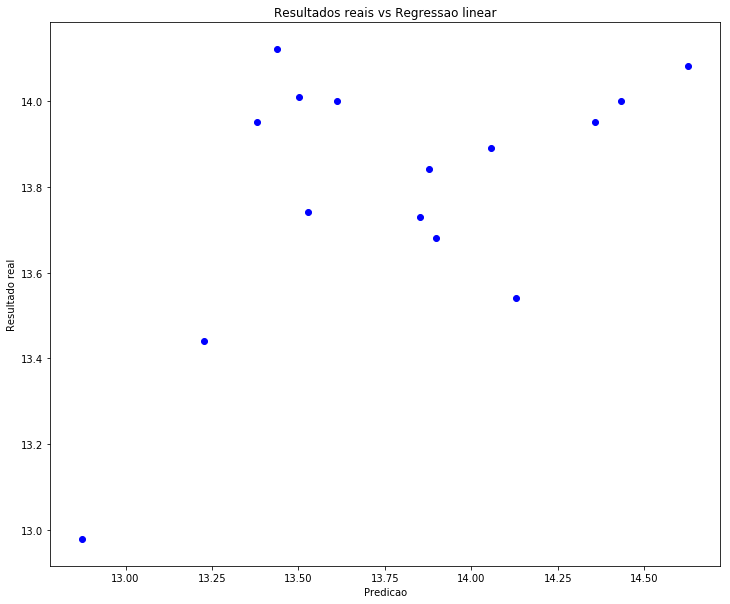

treinando
regr.score(X_train, y_train):  -0.910266139158 

testando
regr.score(X_test, y_test): -0.91
erro médio quadratico:  0.15943505701 

regr.score(X_test, y_test): -0.91
erro médio absoluto:  0.346612025224 

regr.score(X_test, y_test): -0.91
R2 score:  -0.910266139158 

regr.score(X_test, y_test): -0.91
variância:  -0.908901918136 



In [12]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import *

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def selecao(df, columns, start_index, end_index):
    grafico(df.ix[start_index:end_index,columns], title="Acao")
    
def grafico(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Periodo")
    ax.set_ylabel("Preco")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

def regressao_linear():
    df = pd.read_csv(busca_acao('IEX_stock_VALE_chart_1m'), index_col='date', parse_dates=True, error_bad_lines=False, usecols=['date', 'open', 'high', 'low', 'close'], na_filter=False, na_values=['null'])
    df = df.sort_index(ascending=True, axis=0)
    df['previsao_para_05_dias'] = df['close']
    df['previsao_para_05_dias'] = df['previsao_para_05_dias'].shift(-5)
    X_train = df.iloc[0:15,:-1]
    y_train = df.iloc[0:15, -1]
    X_test = df.iloc[0:15,:-1]
    y_test = df.iloc[0:15, -1]
    regr = linear_model.LinearRegression(fit_intercept=False, normalize=False, copy_X=False)
    regr.fit(X_train, y_train)
    regr.predict(X_test)
    print "\n"
    plt.figure(figsize=(12,10))
    plt.title("Resultados reais vs Regressao linear")
    plt.xlabel("Predicao")
    plt.ylabel("Resultado real")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    print "treinando"
    print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
    print "testando"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "erro médio quadratico: ", mean_squared_error(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "erro médio absoluto: ", mean_absolute_error(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "R2 score: ", r2_score(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "variância: ", explained_variance_score(y_test, regr.predict(X_test)), "\n"
    
if __name__ == "__main__":
    regressao_linear()

O modelo apresentado não satifaz aos requisitos de aprendizado, visto que o número de amostras é ínfimo e não permite setorizar a concentração de resultados e permitir uma tomada de decisão.
Portanto, visto que a análise para swingtrade/Daytrade não obteve resultados satisfatórios com um conjunto de leituras diárias, faremos a análise, daqui por diante, para o longo prazo.

NOTA1: A análise poderia ser realizada por um resultado horário, em intervalos de 1, 5, 10, 15, 30, 60 e 120min, o que é bastante comum em análise SWINGTRADE/DAYTRADE. No entanto, os arquivos CSV de intervalos horários fornecidos pelos sites especializados para os ativos Brasileiros (B3 IBOVESPA), tanto quanto os API não disponibilizam gratuitamente nesta escala. 

NOTA2: as escalas menores são fornecidas por alguns API estrangeiros para ADR, mas como a análise visou comparar os comportamentos entre as ADR e as ações B3 IBOVESPA (até aonde foi possível), os API não foram inseridos.

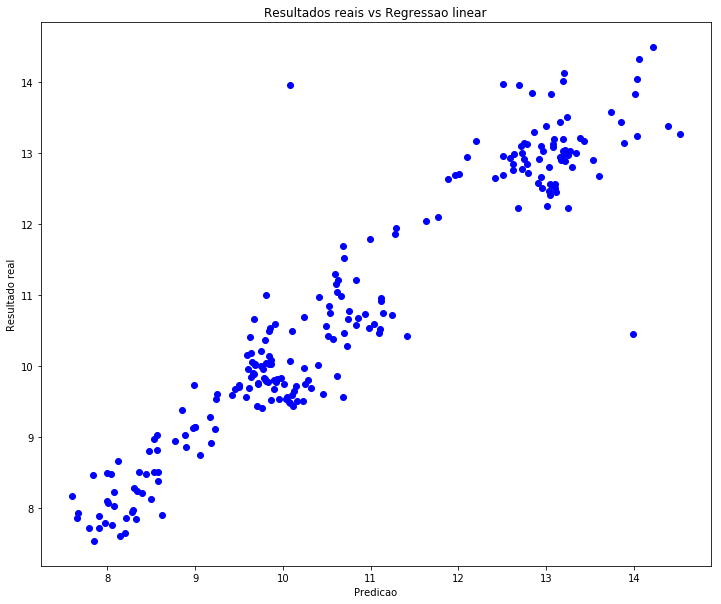

treinando
regr.score(X_train, y_train):  0.899040919272 

testando
regr.score(X_test, y_test): 0.90
erro médio quadratico:  0.3437206426 

regr.score(X_test, y_test): 0.90
erro médio absoluto:  0.413438608697 

regr.score(X_test, y_test): 0.90
R2 score:  0.899040919272 

regr.score(X_test, y_test): 0.90
variância:  0.899113399362 



In [13]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import *

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def selecao(df, columns, start_index, end_index):
    grafico(df.ix[start_index:end_index,columns], title="Acao")
    
def grafico(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Periodo")
    ax.set_ylabel("Preco")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

def regressao_linear():
    df = pd.read_csv(busca_acao('IEX_stock_VALE_chart_1y'), index_col='date', parse_dates=True, error_bad_lines=False, usecols=['date', 'open', 'high', 'low', 'close'], na_filter=False, na_values=['null'])
    df = df.sort_index(ascending=True, axis=0)
    df['previsao_para_05_dias'] = df['close']
    df['previsao_para_05_dias'] = df['previsao_para_05_dias'].shift(-5)
    X_train = df.iloc[0:230,:-1]
    y_train = df.iloc[0:230, -1]
    X_test = df.iloc[0:230,:-1]
    y_test = df.iloc[0:230, -1]
    regr = linear_model.LinearRegression(fit_intercept=False, normalize=False, copy_X=False)
    regr.fit(X_train, y_train)
    regr.predict(X_test)
    print "\n"
    plt.figure(figsize=(12,10))
    plt.title("Resultados reais vs Regressao linear")
    plt.xlabel("Predicao")
    plt.ylabel("Resultado real")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    print "treinando"
    print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
    print "testando"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "erro médio quadratico: ", mean_squared_error(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "erro médio absoluto: ", mean_absolute_error(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "R2 score: ", r2_score(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "variância: ", explained_variance_score(y_test, regr.predict(X_test)), "\n"
    
if __name__ == "__main__":
    regressao_linear()

A análise dos dados anuais, conforme o gráfico "Resultados reais vs Regressao linear" permite avaliar melhor a setorização de dados e permite obter um modelo de aprendizado.
A eficiencia do modelo foi de aproximadamente 90% e isto é muito superior ao indíce de acerto das analises técnicas convencionais e permite cnsiderar o modelo para uma análise de longo prazo. O ponto relevante a se destacar é que este modelo está baseado para um espaço amostral muito superior ao utilizado para uma análise swingtrade, logo, ele sugere que este modelo não suporta bem à oscilações típicas de análises swingtrade.

### Regressão KNN

C:\Users\Marcelo\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Marcelo\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Treino KNeighborsRegressor...
Melhor parametro:  {'n_neighbors': 15, 'weights': 'uniform', 'leaf_size': 1}
Melhor medida:  -1.23418429946




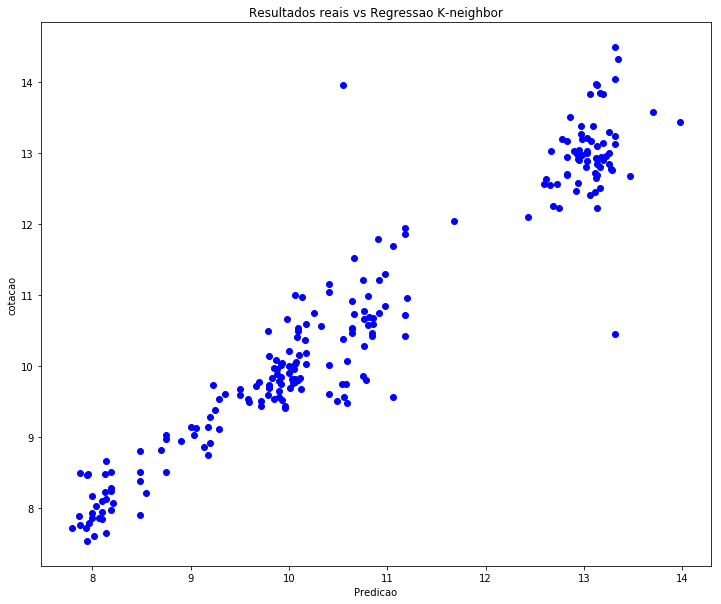

Resultados reais vs Regressao KNN (n_neighbors = 15)
regr.score(X_test, y_test): 0.92
Erro medio quadratico:  0.265718990051 

regr.score(X_train, y_train):  0.912919956456 

testando
regr.score(X_test, y_test): 0.92
erro médio quadratico:  0.265718990051 

regr.score(X_test, y_test): 0.92
erro médio absoluto:  0.346227090909 

regr.score(X_test, y_test): 0.92
R2 score:  0.918706863653 

regr.score(X_test, y_test): 0.92
variância:  0.919085265782 



In [1]:
import time
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline 

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def selecao(df, columns, start_index, end_index):
    grafico(df.ix[start_index:end_index,columns], title="IEX_stock_VALE_chart_1y")
    
def grafico(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Periodo")
    ax.set_ylabel("Preco")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
def train_knn(knn, X, y):
    print "Treino {}...".format(knn.__class__.__name__)
    data_inicial = time.time()
    fatores_K = [1,5,10,15,20,25,30]
    leaves = [1,5,10,15,20,25,30]
    pesos = ['uniform', 'distance']
    parametros = {'n_neighbors': fatores_K, 'leaf_size': leaves, 'weights': pesos}
    knn = GridSearchCV(knn, parametros, cv=10)
    knn.fit(X, y)
    print "Melhor parametro: ", knn.best_params_
    print "Melhor medida: ", knn.best_score_
    print "\n"
    data_final = time.time()
    return knn
    
def regressao_KNN():
    
    df = df = pd.read_csv(busca_acao('IEX_stock_VALE_chart_1y'), index_col='date', parse_dates=True, error_bad_lines=False, usecols=['date', 'open', 'high', 'low', 'close'], na_filter=False, na_values=['null'])
    df = df.sort_index(ascending=True, axis=0)
    df['previsao_para_05_dias'] = df['close']
    df['previsao_para_05_dias'] = df['previsao_para_05_dias'].shift(-5)
    X_train = df.iloc[0:200,:-1]
    y_train = df.iloc[0:200, -1]
    X_test = df.iloc[0:220,:-1]
    y_test = df.iloc[0:220, -1]
    knn = KNeighborsRegressor()
    train_knn(knn, X_train, y_train)
    regr = KNeighborsRegressor()
    regr.fit(X_train, y_train)
    plt.figure(figsize=(12,10))
    plt.title("Resultados reais vs Regressao K-neighbor")
    plt.xlabel("Predicao")
    plt.ylabel("cotacao")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    print "Resultados reais vs Regressao KNN (n_neighbors = 15)"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "Erro medio quadratico: ", mean_squared_error(regr.predict(X_test), y_test), "\n"
    print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
    print "testando"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "erro médio quadratico: ", mean_squared_error(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "erro médio absoluto: ", mean_absolute_error(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "R2 score: ", r2_score(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "variância: ", explained_variance_score(y_test, regr.predict(X_test)), "\n"
if __name__ == "__main__":
    regressao_KNN()

Em concordância com a regressão linear, a regressão K-neighbor obteve resultados similares (aproximadamente 02% superior a regressão linear), conforme o gráfico "Regressao K-neighbor", e permite afirmar que ambas servem como modelo de aprendizado.


NOTA:
Um ponto de análise merece destaque, os gráficos "Resultados reais vs Regressao linear" e "Regressao K-neighbor" criaram dois quadrantes de concentração de dados. Esta "quase separação" entre os dois blocos se deve a variação ocorrida em 27/11/2017 e a posterior valorização das ações do setor, conhecido como rali.  Para demonstrar isto, vamos refazer o gráfido da variação do preço máximo para o período de um ano.

C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


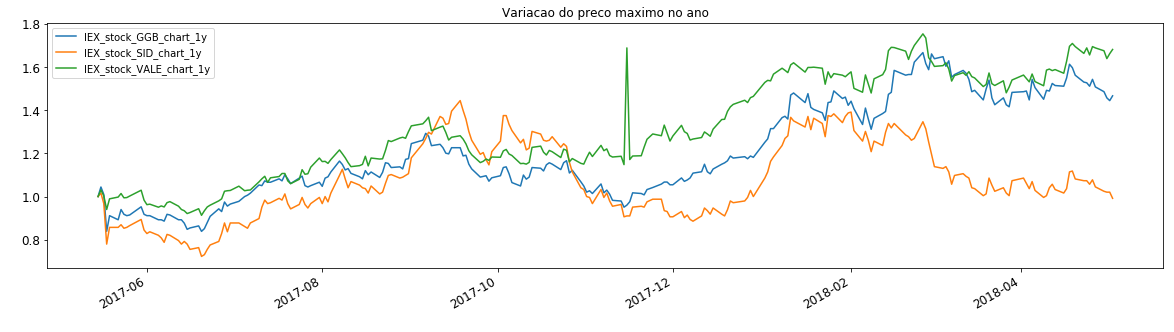

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def busca_acao(acao, base_dir="data"):
     return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, dates):
    df = pd.DataFrame(index=dates)
    if 'IEX_stock_GGB_chart_1y' not in acoes:
        acoes.insert(0,'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date',parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y': 
            df = df.dropna(subset=['IEX_stock_GGB_chart_1y'])
    return df

def dado_normalizado(df):
    return df/ df.ix[0,:]

def grafico(df, title='title', xlabel=" ", ylabel=" "):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def grafico_normalizado(df, columns, start_index, end_index):
    df = dado_normalizado(df)
    grafico(df.ix[start_index:end_index,columns], title="Variacao do preco maximo no ano")
    df = df.ix[start_index: end_index, columns] 

def teste():
    datas = pd.date_range('2017-05-01', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y'] 
    df = busca_dados(acoes, datas)
    grafico_normalizado(df, ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y'], '2017-05-01', '2018-05-03',)

if __name__ == "__main__":
    teste()

Percebe-se nitidamente a elevação do preço da ação, pós conversão de VALE5-VALE3 (movimento representado pelo pico), e o rali do aço ocorrido de dezembro em diante.

A ação da CSN (ADR SID) segue um padrão próximo às demais ações, porém com maior volatilidade, portanto, um modelo de aprendizado tende a apresentar um maior espalhamento dos pontos. Então, vamos testar o modelo com SID e comparar o resultado.

Treino KNeighborsRegressor...


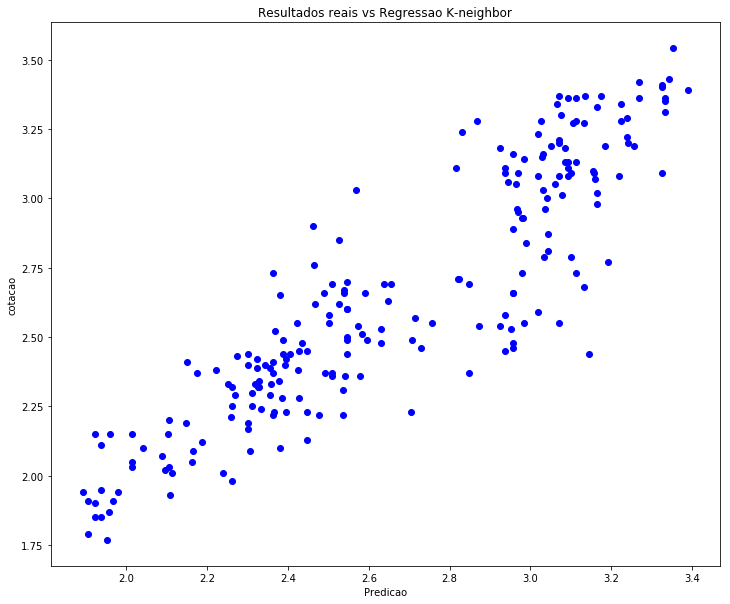

Resultados reais vs Regressao KNN (n_neighbors = 15)
regr.score(X_test, y_test): 0.81
Erro medio quadratico:  0.0379412181818 

regr.score(X_train, y_train):  0.836986692344 

testando
regr.score(X_test, y_test): 0.81
erro médio quadratico:  0.0379412181818 

regr.score(X_test, y_test): 0.81
erro médio absoluto:  0.146736363636 

regr.score(X_test, y_test): 0.81
R2 score:  0.805309180506 

regr.score(X_test, y_test): 0.81
variância:  0.807617406405 



In [9]:
import time
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline 

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def selecao(df, columns, start_index, end_index):
    grafico(df.ix[start_index:end_index,columns], title="IEX_stock_SID_chart_1y")
    
def grafico(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Periodo")
    ax.set_ylabel("Preco")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
def train_knn(knn, X, y):
    print "Treino {}...".format(knn.__class__.__name__)
    data_inicial = time.time()
    fatores_K = [1,5,10,15,20,25,30]
    leaves = [1,5,10,15,20,25,30]
    pesos = ['uniform', 'distance']
    parametros = {'n_neighbors': fatores_K, 'leaf_size': leaves, 'weights': pesos}
    knn = GridSearchCV(knn, parametros, cv=10)
    knn.fit(X, y)
    data_final = time.time()
    return knn
    
def regressao_KNN():
    
    df = df = pd.read_csv(busca_acao('IEX_stock_SID_chart_1y'), index_col='date', parse_dates=True, error_bad_lines=False, usecols=['date', 'open', 'high', 'low', 'close'], na_filter=False, na_values=['null'])
    df = df.sort_index(ascending=True, axis=0)
    df['previsao_para_05_dias'] = df['close']
    df['previsao_para_05_dias'] = df['previsao_para_05_dias'].shift(-5)
    X_train = df.iloc[0:200,:-1]
    y_train = df.iloc[0:200, -1]
    X_test = df.iloc[0:220,:-1]
    y_test = df.iloc[0:220, -1]
    knn = KNeighborsRegressor()
    train_knn(knn, X_train, y_train)
    regr = KNeighborsRegressor()
    regr.fit(X_train, y_train)
    plt.figure(figsize=(12,10))
    plt.title("Resultados reais vs Regressao K-neighbor")
    plt.xlabel("Predicao")
    plt.ylabel("cotacao")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    print "Resultados reais vs Regressao KNN (n_neighbors = 15)"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "Erro medio quadratico: ", mean_squared_error(regr.predict(X_test), y_test), "\n"
    print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
    print "testando"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "erro médio quadratico: ", mean_squared_error(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "erro médio absoluto: ", mean_absolute_error(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "R2 score: ", r2_score(y_test, regr.predict(X_test)), "\n"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    print "variância: ", explained_variance_score(y_test, regr.predict(X_test)), "\n"
       
if __name__ == "__main__":
    regressao_KNN()

Conforme esperado, temos que:
1.  Os resultados apresentaram um espalhamento maior e não representam um grupo ou quadrante específico.
2.  O modelo teve menor eficiência (-11%) em comparação à VALE e isto está diretamente relacionado à volatilidade desta, principalmente pós BLOCK TRADE.

Estabelecendo um cenário comparativo entre os modelos, temos:

##### TREINO
| Indíce  | VALE | SID | VALE-SID |
| :---------: | :-----------: | :-----------: |
|Regr.score   |  0.912919956456        |     0.836986692344       |   0.075933264      |
|Erro medio quadratico | 0.265718990051  |    0.0379412181818       |   0.227777772       |

##### TESTE
| Indíce  | VALE | SID |VALE-SID |
| :---------: | :-----------: | :-----------: |
|Regr.score   |  0.92        |   0.81        |   0.836986692344       |
|Erro medio quadratico | 0.265718990051  |   0.0379412181818       |      0.227777772       |  
|Erro médio absoluto    |  0.346227090909        |  0.146736363636        |   0.199490727       |
|R2 score    |  0.918706863653     |  0.805309180506         |   0.113397683       |
|Variância   |  0.919085265782       |  0.807617406405        |   0.111467859   |



Onde:
1. Erro medio quadratico da VALE foi 22,77% menor que SID, o que indica uma maior conformidade desta ação em relação a sua amostra e consequentemente com maior chance de acerto. 
2. Erro médio absoluto da VALE foi 19,95% maior que SID, o que indica que a volatilidade de SID superou o evento de VALE dado que o grande conjunto de eventos em SID se sobrpos a um único e significativo evento em VALE.
3. R2 score da VALE é 11,34% maior que SID o que indica uma maior conformidade desta ação em relação a sua amostra e consequentemente com maior chance de acerto.  
4. Variância da VALE é 11,14% maior que SID, o que indica uma maior conformidade desta ação em relação a sua amostra e consequentemente com maior chance de acerto.

Portanto, temos quatro parâmetros que atestam a escolha pela VALE em relação a SID e todos obtidos pelo melhor modelo de treinamento que obtivemos.

Dados os modelos de predição e a eficácia de seus resultados, temos as curvas de Bollinger e as medias móveis exponenciais abaixo para atestar a predição realizada.

### Bollinger

Nesta primeira análise, temos as curvas de Bollinger, por ação, indicando os pontos de compra (banda inferior) e venda (banda superior). Contudo, como pode ser visto nos gráficos, os pontos não definem valores claros de compra ou venda, e é este dado que a predição complementa e ajusta para um trade mais objetivo e com menos erros de decisão.

C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\Marcelo\Anaconda2\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


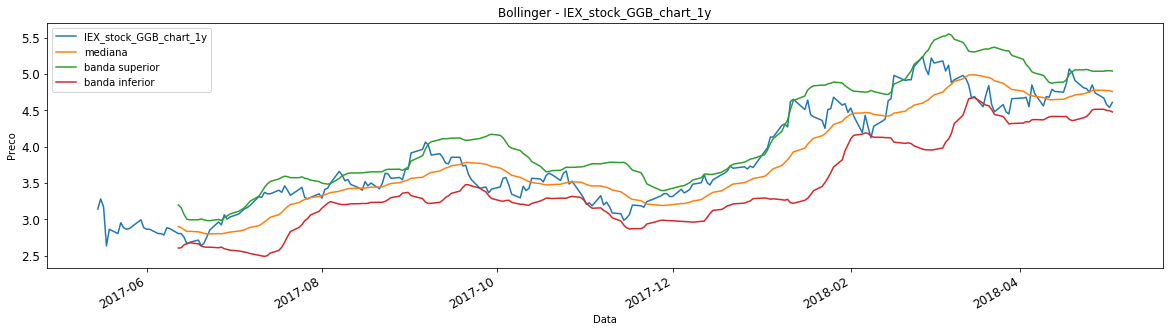

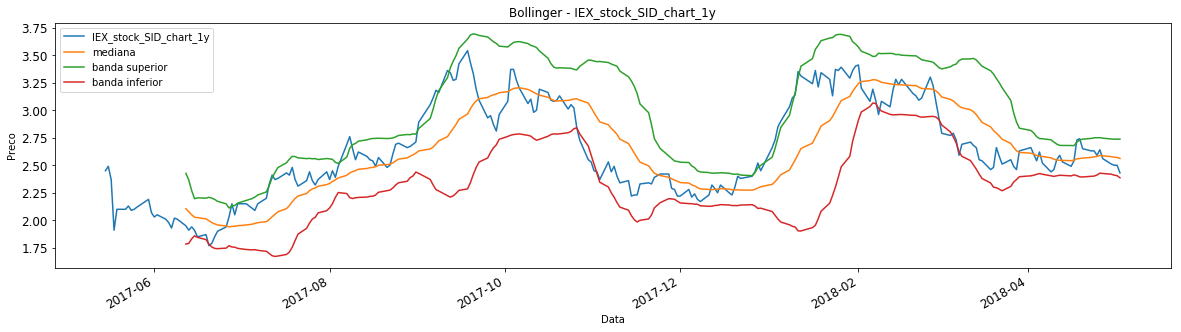

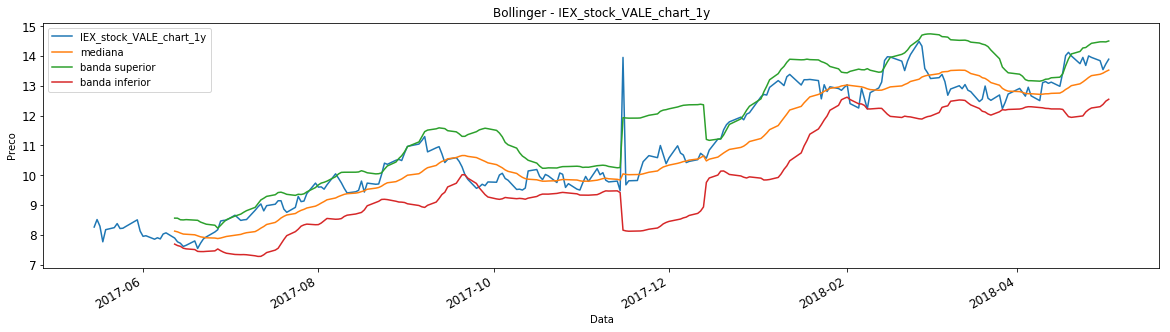

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

def busca_acao(acao, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(acao)))

def busca_dados(acoes, Datas):
    df = pd.DataFrame(index=Datas)
    if 'IEX_stock_GGB_chart_1y' not in acoes:
        acoes.insert(0, 'IEX_stock_GGB_chart_1y')

    for acao in acoes:
        df_temp = pd.read_csv(busca_acao(acao), index_col='date', parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': acao})
        df = df.join(df_temp)
        if acao == 'IEX_stock_GGB_chart_1y':  
            df = df.dropna(subset=["IEX_stock_GGB_chart_1y"])

    return df

def grafico(df, title="Acoes"):
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Data")
    ax.set_ylabel("Preco")
    plt.show()

def plot_grafico(df, columns, start_index, end_index):
    
    for column in columns:
        rm_GGB = mediana(df[column], window=20)
        rstd_GGB = mediana_desvio_padrao(df[column], window=20)
        banda_superior, banda_inferior = Busca_curvas_de_Bollinger(rm_GGB, rstd_GGB)
        ax = df[column].plot(title="Bollinger - " + column, label=column, fontsize=12,figsize=(20,5))
        rm_GGB.plot(label='mediana', ax=ax)
        banda_superior.plot(label='banda superior', ax=ax)
        banda_inferior.plot(label='banda inferior', ax=ax)
        ax.set_xlabel("Data")
        ax.set_ylabel("Preco")
        ax.legend(loc='upper left')
        plt.show()
    

def mediana(values, window):
    return pd.rolling_mean(values, window=window)

def mediana_desvio_padrao(values, window):
    return pd.rolling_std(values, window=window)

def Busca_curvas_de_Bollinger(rm, rstd):
    banda_superior = rm + rstd * 2
    banda_inferior = rm - rstd * 2
    return banda_superior, banda_inferior

def grafico_curvas_de_Bollinger():
    datas = pd.date_range('2017-05-01', '2018-05-03')
    acoes = ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y'] 
    df = busca_dados(acoes, datas)
    plot_grafico(df, ['IEX_stock_GGB_chart_1y','IEX_stock_SID_chart_1y','IEX_stock_VALE_chart_1y'], '2017-05-01', '2018-05-03',)

if __name__ == "__main__":
    grafico_curvas_de_Bollinger()

### MACD 

Nesta segunda análise, temos as médias móveis exponenciais, para VALE, a ação mais consistente, e para SID, a ação mais volátil, onde a leitura dos gráficos se baseia no cruzamento das médias e , como  pode ser visto nos gráficos, os valores decaem ou crescem a cada interseção obtida. Contudo, como pode ser visto nos gráficos, as rampas crescentes/decrescentes ocorrem após os cruzamentos e isto torna a decisão de compra/venda tardia nos casos em que a inclinação da rampa é elevada e é isto que a predição resolve.

#### VALE

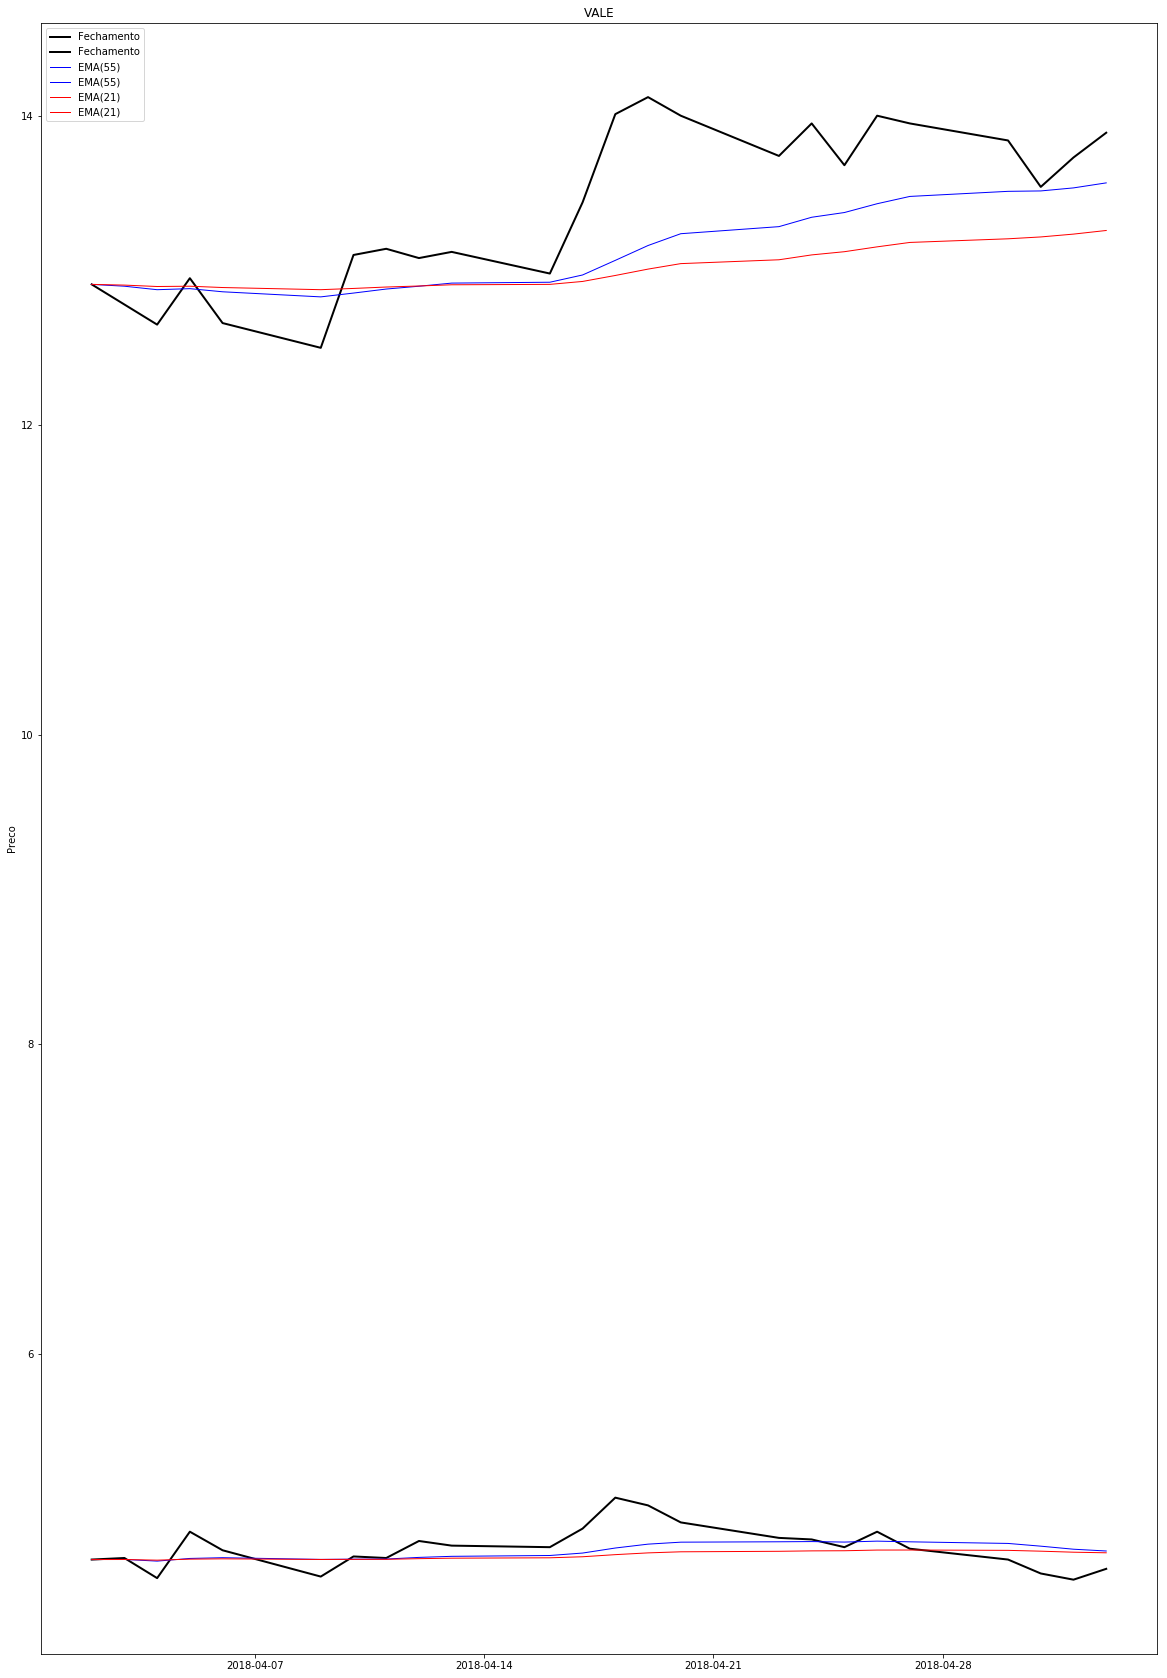

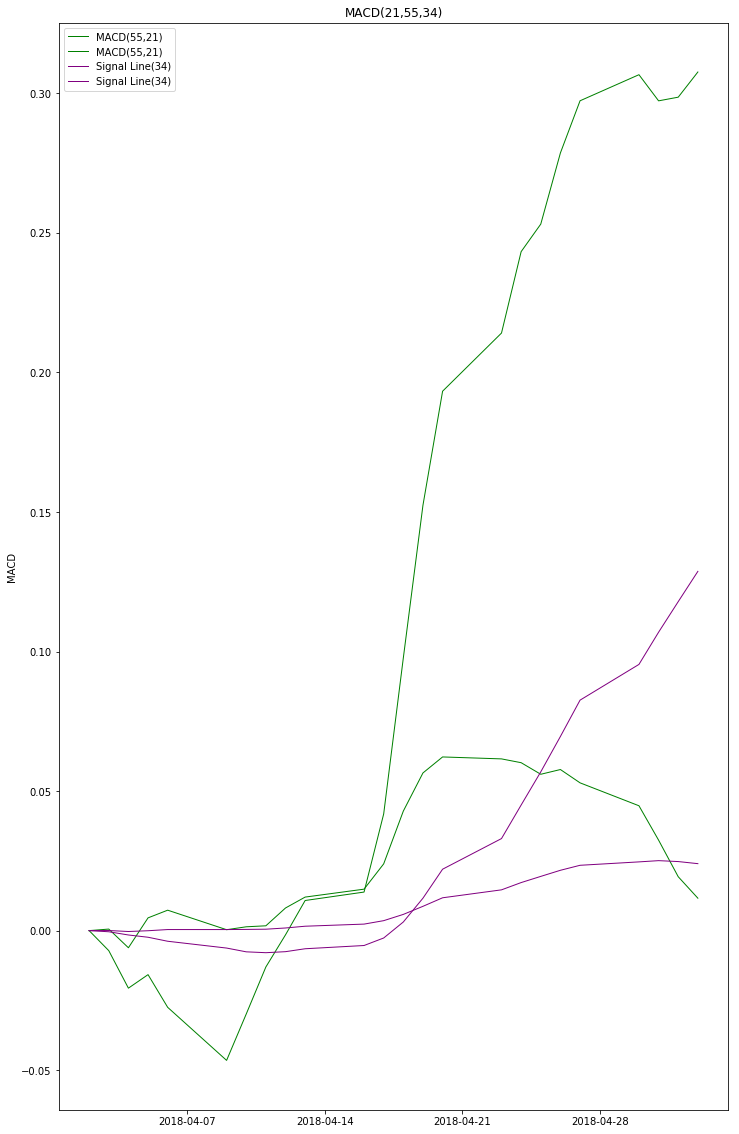

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

datas = pd.date_range('2018-04-01', '2018-05-03') 
acoes = ['IEX_stock_VALE_chart_1y']
df = busca_dados(acoes, datas)
slow_period = 55
fast_period = 21
signal_period = 34


def macd(df, slow_period, fast_period):
    emaslow = df.ewm(span=slow_period, adjust=False).mean()
    emafast = df.ewm(span=fast_period, adjust=False).mean()    
    return emafast, emaslow, emafast - emaslow

emaslow, emafast, macd_line = macd(df, slow_period, fast_period)
signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()

f1, ax1 = plt.subplots(figsize = (20,30))
ax1.plot(df.index, df, color = 'black', lw=2, label='Fechamento')
ax1.plot(df.index, emaslow, color ='blue', lw=1, label='EMA(55)')
ax1.plot(df.index, emafast, color ='red', lw=1, label='EMA(21)')

f2, ax2 = plt.subplots(figsize = (12,20))
ax2.plot(df.index, macd_line, color='green', lw=1,label='MACD(55,21)')
ax2.plot(df.index, signal_line, color='purple', lw=1, label='Signal Line(34)')

ax1.legend(loc='upper left')
ax1.set(title = 'VALE', ylabel = 'Preco')
ax2.set(title = 'MACD(21,55,34)', ylabel='MACD')
ax2.legend(loc = 'upper left')
ax2.grid(False)

plt.show()

#### SID

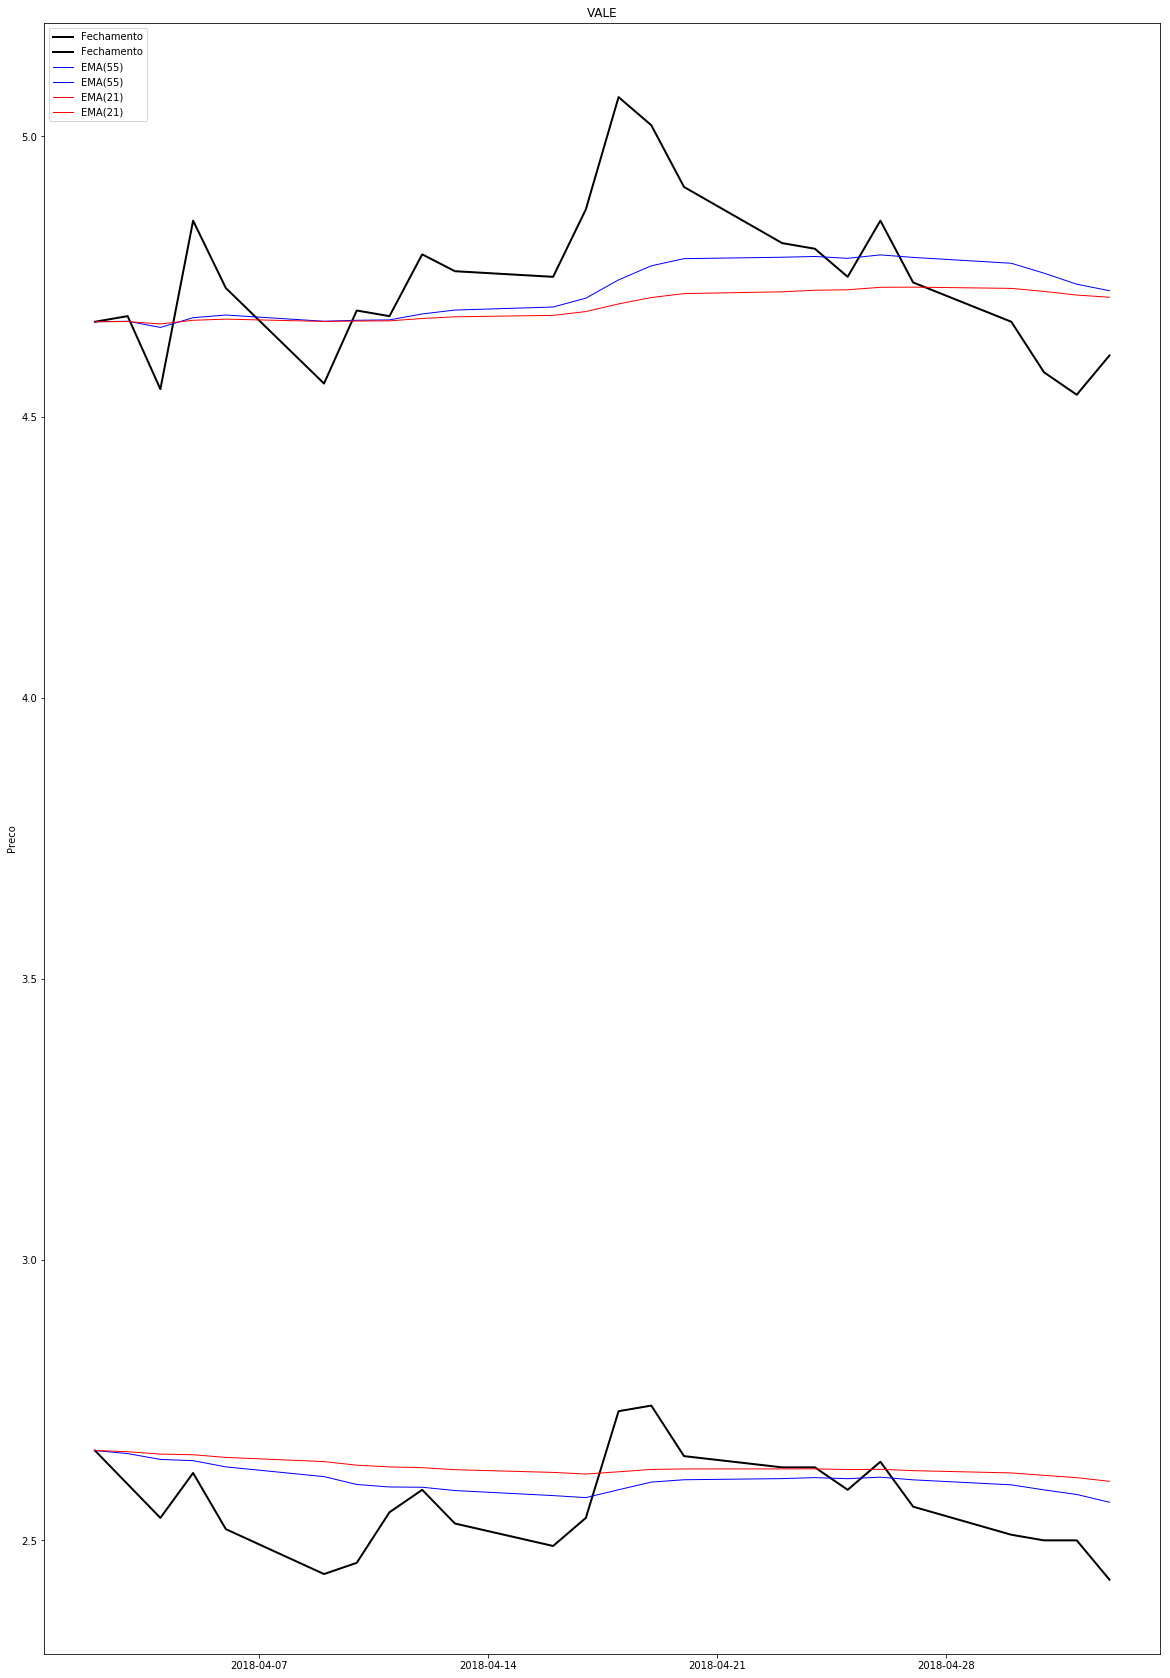

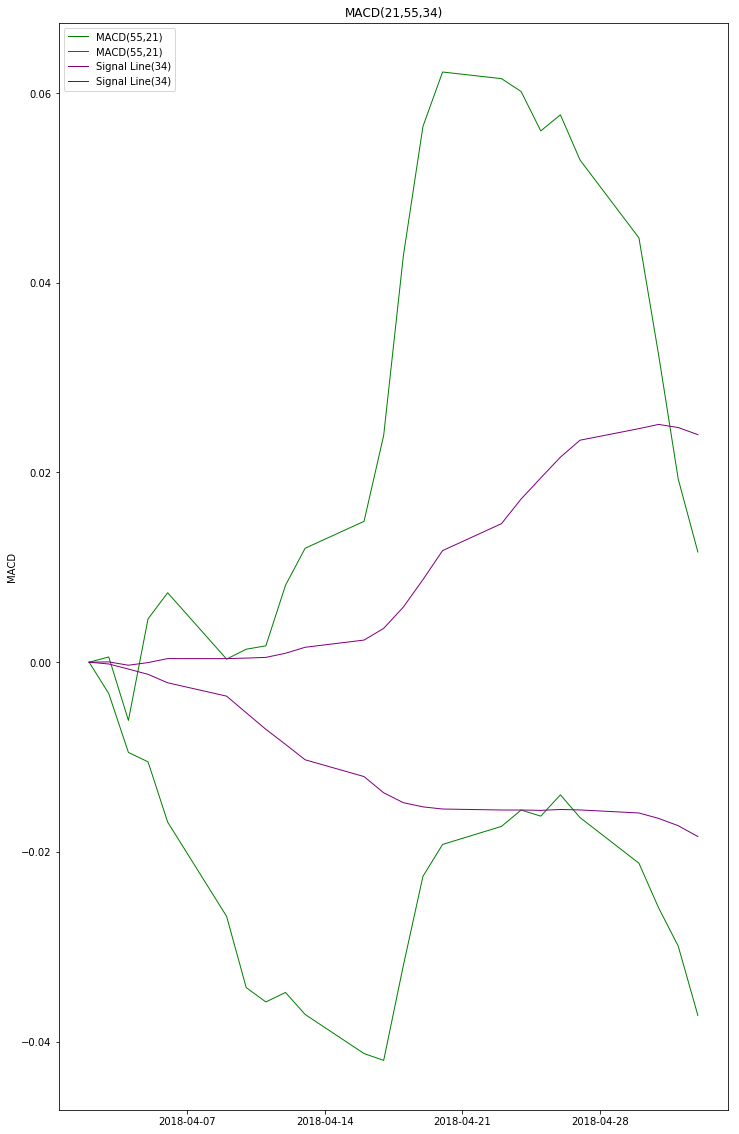

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

datas = pd.date_range('2018-04-01', '2018-05-03') 
acoes = ['IEX_stock_SID_chart_1y']
df = busca_dados(acoes, datas)
slow_period = 55
fast_period = 21
signal_period = 34


def macd(df, slow_period, fast_period):
    emaslow = df.ewm(span=slow_period, adjust=False).mean()
    emafast = df.ewm(span=fast_period, adjust=False).mean()    
    return emafast, emaslow, emafast - emaslow

emaslow, emafast, macd_line = macd(df, slow_period, fast_period)
signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()

f1, ax1 = plt.subplots(figsize = (20,30))
ax1.plot(df.index, df, color = 'black', lw=2, label='Fechamento')
ax1.plot(df.index, emaslow, color ='blue', lw=1, label='EMA(55)')
ax1.plot(df.index, emafast, color ='red', lw=1, label='EMA(21)')

f2, ax2 = plt.subplots(figsize = (12,20))
ax2.plot(df.index, macd_line, color='green', lw=1,label='MACD(55,21)')
ax2.plot(df.index, signal_line, color='purple', lw=1, label='Signal Line(34)')

ax1.legend(loc='upper left')
ax1.set(title = 'VALE', ylabel = 'Preco')
ax2.set(title = 'MACD(21,55,34)', ylabel='MACD')
ax2.legend(loc = 'upper left')
ax2.grid(False)

plt.show()

## CONCLUSÃO

Como pode ser visto nas predições realizadas, o modelo de aprendizagem KNN permite obter a melhor predição de preços e os resultados obtidos, quando combinados com as análises técnicas permitem prever com razoável segurança o preço de compra ou venda de uma ação.
A eficiência calculada dos modelos mostrou que a predição não exclui erros provocados por eventos externos ao mercado e movimentos antecipatórios de compra e venda, típicos de rumores e humores do mercado.  A predição também não é capaz de se resguardar de eventuais erros contábeis, questões administrativas ou movimentos setorizados que possam levar a ação a reboque e contra a tendência natural dela.
Esta modelagem utilizou arquivos CSV e isto exige uma constante alimentação de informações ao sistema, ao passo que um acesso a um API tornaria o sistema mais dinâmico e mais simples de implementar. No entanto, por razões relacionadas a sensibilidade dos dados requeridos (API KEY ou similares de uso pessoal), esta predição não utilizou esta base de dados.
O modelo testado acima, quando combinado com uma interface usuário amigável, um API de tempo real e recurso computacional dedicado, permite externar os valores em tempo real para consulta ou decisão, conforme o grau de automatismo da operação.

# CASO PARTICULAR: API IEX

O modelo abaixo se refere a uma análise técnica obtida através de uma API, que neste caso é a ALPHA VANTAGE, e que possui ampla biblioteca de implementação para diferentes funções de análise.

site:
https://www.alphavantage.co/documentation/

NOTA 1:  Este modelo está incluído neste estudo apenas para comprovar o uso desta via, mas o arquivo que subirá posteriormente no GitHub não contará com este parte, devido a presença da minha chave (API KEY).
Particurlarmente, o projeto seria muito mais simples por este caminho, inclusive mais dinâmico, mas a chave inviabiliza o uso.
NOTA 2: O modelo de predição não foi incluído ao final deste caso, pois o resultado não divergiria do obtido no  modelo já descrito e para não tornar este documento muito extenso.

Agradeço a compreensão.

#### Leitura dos dados

A API AlphaVantage, embora não tenha sido listada no arquivo testeAPI, apresenta a mais extensa documentação que encontrei dentre todos os API destinados a trade.

A API permite obter diferentes tempos amostrais para análises diversas e isto vem por um simples comando, como demonstrado abaixo:

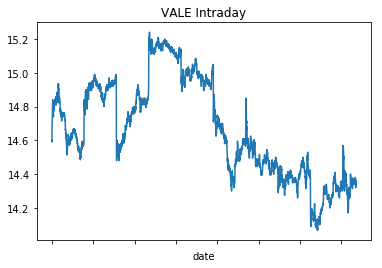

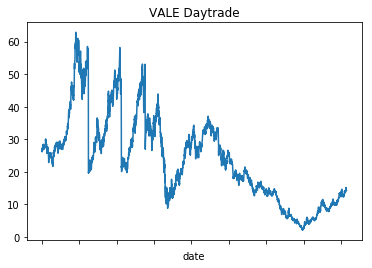

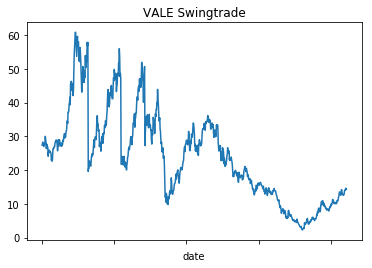

In [21]:
import os
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import *
import matplotlib.pyplot as plt
%matplotlib inline 
from pprint import pprint

ts1 = TimeSeries(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ts1.get_intraday(symbol='VALE',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('VALE Intraday')
plt.show()

ts2 = TimeSeries(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ts2.get_daily(symbol='VALE', outputsize='full')
data['4. close'].plot()
plt.title('VALE Daytrade')
plt.show()

ts3 = TimeSeries(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ts3.get_weekly(symbol='VALE')
data['4. close'].plot()
plt.title('VALE Swingtrade')
plt.show()

Tal qual a obtenção das séries temporais, as análises técnicas também são obtidas por comando direto.  Como o modelo que criei analisa apenas MACD e Bollinger, então exemplifico aqui apenas estes e apenas para a VALE, melhor ação da carteira, pois o objetivo é apenas exemplificar.

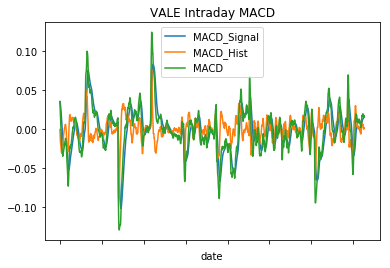

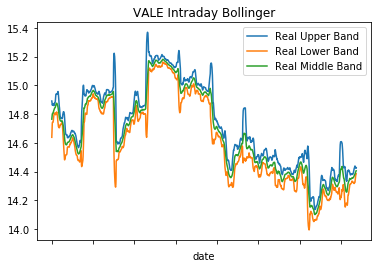

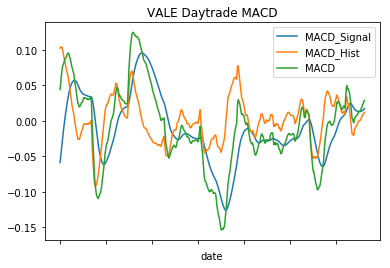

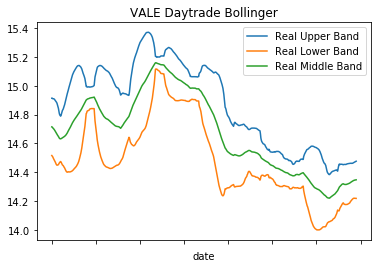

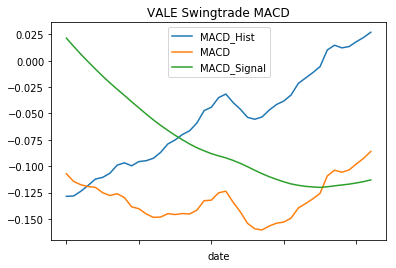

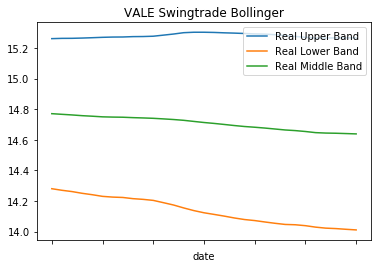

In [1]:
import os
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import *
import matplotlib.pyplot as plt
%matplotlib inline 
from pprint import pprint
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti1 = TechIndicators(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ti1.get_macd(symbol='VALE', interval='1min', fastperiod=21, slowperiod=55, signalperiod=34)
data.plot()
plt.title('VALE Intraday MACD')
plt.show()

ti2 = TechIndicators(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ti2.get_bbands(symbol='VALE', interval='1min', time_period=34)
data.plot()
plt.title('VALE Intraday Bollinger')
plt.show()

ti3 = TechIndicators(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ti3.get_macd(symbol='VALE', interval='5min', fastperiod=21, slowperiod=55, signalperiod=34)
data.plot()
plt.title('VALE Daytrade MACD')
plt.show()

ti4 = TechIndicators(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ti4.get_bbands(symbol='VALE', interval='5min', time_period=60, series_type='close')
data.plot()
plt.title('VALE Daytrade Bollinger')
plt.show()

ti5 = TechIndicators(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ti5.get_macd(symbol='VALE', interval='30min', fastperiod=21, slowperiod=55, signalperiod=34)
data.plot()
plt.title('VALE Swingtrade MACD')
plt.show()

ti6 = TechIndicators(key='9S5EAEVX9L5S3AGI', output_format='pandas')
data, meta_data = ti6.get_bbands(symbol='VALE', interval='30min', time_period=100, series_type='close')
data.plot()
plt.title('VALE Swingtrade Bollinger')
plt.show()